<a href="https://colab.research.google.com/github/gongbububu/gongbububu/blob/main/%EC%A0%84%EA%B7%B9%EA%B5%AC%EC%A1%B0%EB%AA%A8%EC%82%AC_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LFP 배치 위치: (7.12, 2.87), 반지름: 1.94, 기공률: 88.19%
LFP 배치 위치: (9.01, 9.04), 반지름: 1.89, 기공률: 76.43%
LFP 배치 위치: (2.01, 0.42), 반지름: 1.41, 기공률: 69.90%
LFP 배치 위치: (0.20, 4.56), 반지름: 1.80, 기공률: 59.20%
LFP 배치 위치: (3.86, 9.45), 반지름: 1.53, 기공률: 51.50%
LFP 배치 위치: (0.75, 9.69), 반지름: 1.32, 기공률: 45.74%
LFP 배치 위치: (3.61, 4.90), 반지름: 1.36, 기공률: 39.97%
LFP 배치 위치: (9.42, 5.71), 반지름: 1.27, 기공률: 34.65%
LFP 배치 위치: (8.98, -0.09), 반지름: 1.32, 기공률: 28.87%
LFP 배치 위치: (5.63, 6.79), 반지름: 1.27, 기공률: 23.77%
LFP 배치 위치: (5.19, 0.01), 반지름: 1.34, 기공률: 17.84%
Final porosity: 17.84%


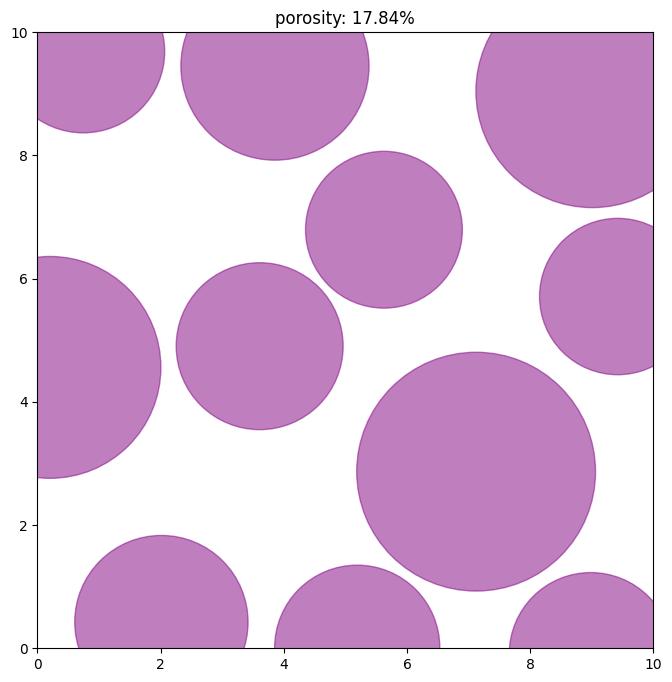

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# 랜덤 시드 고정
np.random.seed(3)

# 원의 면적 계산 함수 (잘린 원을 포함한 계산)
def circle_rect_area(x, y, r, domain_size):
    if 0 <= x - r and x + r <= domain_size and 0 <= y - r and y + r <= domain_size:
        return pi * r**2
    else:
        return pi * r**2 * 1.05

# LFP 배치 함수
def increase_radius_to_target_porosity(domain_size, min_r_LFP=1.25, max_r_LFP=2.5, target_porosity=0.2, max_attempts=10000):
    lfp_positions = []
    total_area = domain_size ** 2
    max_occupied_area = total_area * (1 - target_porosity)
    occupied_area = 0
    attempts = 0

    while occupied_area < max_occupied_area and attempts < max_attempts:
        r_LFP = np.random.uniform(min_r_LFP, max_r_LFP)
        x = np.random.uniform(-0.1, domain_size + 0.1)
        y = np.random.uniform(-0.1, domain_size + 0.1)

        overlap = False
        for lx, ly, lr in lfp_positions:
            dist = np.hypot(x - lx, y - ly)
            if dist < (r_LFP + lr) * 1.05:
                overlap = True
                break

        if not overlap:
            lfp_positions.append((x, y, r_LFP))
            occupied_area = sum(circle_rect_area(x, y, r, domain_size) for (x, y, r) in lfp_positions)
            print(f"LFP 배치 위치: ({x:.2f}, {y:.2f}), 반지름: {r_LFP:.2f}, 기공률: {1 - occupied_area / total_area:.2%}")

        attempts += 1

    while occupied_area < max_occupied_area and attempts < max_attempts:
        lfp_positions.sort(key=lambda x: x[2])

        for i in range(len(lfp_positions)):
            lx, ly, lr = lfp_positions[i]
            if lr < max_r_LFP:
                new_lr = lr + 0.07
                overlap = False
                for j in range(len(lfp_positions)):
                    if i != j:
                        lpx, lpy, lpr = lfp_positions[j]
                        dist = np.hypot(lx - lpx, ly - lpy)
                        if dist < (new_lr + lpr) * 1.05:
                            overlap = True
                            break

                if not overlap:
                    lfp_positions[i] = (lx, ly, new_lr)
                    occupied_area = sum(circle_rect_area(x, y, r, domain_size) for (x, y, r) in lfp_positions)
                    print(f"LFP 배치 위치: ({lx:.2f}, {ly:.2f}), 반지름: {new_lr:.2f}, 기공률: {1 - occupied_area / total_area:.2%}")

        attempts += 1

    occupied_area = sum(circle_rect_area(x, y, r_LFP, domain_size) for (x, y, r_LFP) in lfp_positions)
    porosity = 1 - occupied_area / total_area
    print(f"Final porosity: {porosity:.2%}")

    return lfp_positions

# 예시 사용
domain_size = 10
target_porosity = 0.1
lfp_positions = increase_radius_to_target_porosity(domain_size, target_porosity=target_porosity)

# 시각화
plt.figure(figsize=(8, 8))
for (lx, ly, lr) in lfp_positions:
    circle = patches.Circle((lx, ly), lr, color='purple', alpha=0.5)
    plt.gca().add_artist(circle)
plt.xlim(0, domain_size)
plt.ylim(0, domain_size)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"porosity: {1 - sum(circle_rect_area(x, y, r_LFP, domain_size) for (x, y, r_LFP) in lfp_positions) / (domain_size ** 2):.2%}")
plt.show()


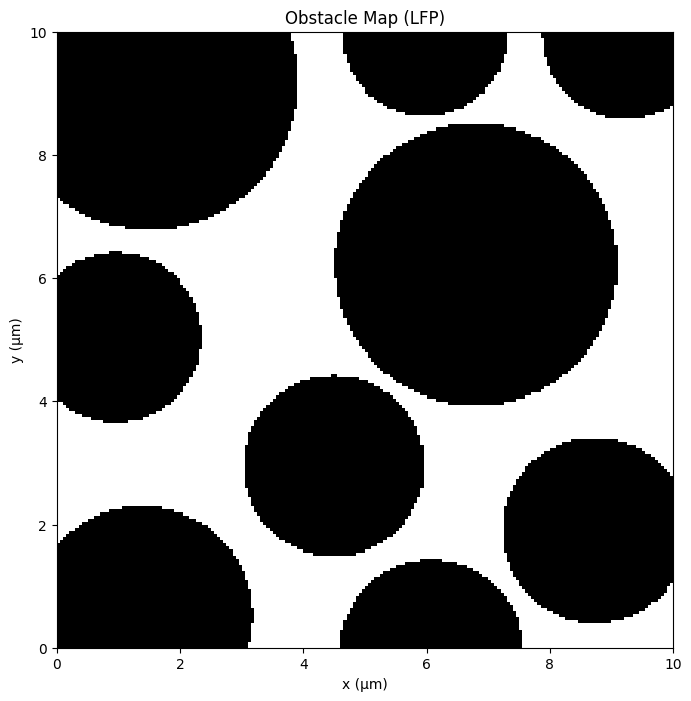

In [ ]:
 def generate_obstacle_map(domain_size, grid_size, lfp_positions, r_cb=0.1):
    grid_resolution = int(domain_size / grid_size)
    obstacle_map = np.zeros((grid_resolution, grid_resolution), dtype=int)

    def mark_obstacle(cx, cy, r):
        for i in range(grid_resolution):
            for j in range(grid_resolution):
                x = i * grid_size + grid_size / 2
                y = j * grid_size + grid_size / 2
                if np.hypot(cx - x, cy - y) <= r:
                    obstacle_map[i, j] = 1

    for lx, ly, lr in lfp_positions:
        mark_obstacle(lx, ly, lr)


    return obstacle_map

# 예시 사용
grid_size = 0.05
obstacle_map = generate_obstacle_map(domain_size, grid_size, lfp_positions)

plt.figure(figsize=(8, 8))
plt.imshow(obstacle_map.T, origin='lower', cmap='Greys', extent=[0, domain_size, 0, domain_size])
plt.title("Obstacle Map (LFP)")
plt.xlabel("x (μm)")
plt.ylabel("y (μm)")
plt.grid(False)
plt.show()

LFP 배치 위치: (7.12, 2.87), 반지름: 1.94, 기공률: 88.19%
LFP 배치 위치: (9.01, 9.04), 반지름: 1.89, 기공률: 76.43%
LFP 배치 위치: (2.01, 0.42), 반지름: 1.41, 기공률: 69.90%
LFP 배치 위치: (0.20, 4.56), 반지름: 1.80, 기공률: 59.20%
LFP 배치 위치: (3.86, 9.45), 반지름: 1.53, 기공률: 51.50%
LFP 배치 위치: (0.75, 9.69), 반지름: 1.32, 기공률: 45.74%
LFP 배치 위치: (3.61, 4.90), 반지름: 1.36, 기공률: 39.97%
LFP 배치 위치: (9.42, 5.71), 반지름: 1.27, 기공률: 34.65%
LFP 배치 위치: (8.98, -0.09), 반지름: 1.32, 기공률: 28.87%
LFP 배치 위치: (5.63, 6.79), 반지름: 1.27, 기공률: 23.77%
LFP 배치 위치: (5.19, 0.01), 반지름: 1.34, 기공률: 17.84%
Final porosity: 17.84%
가장 큰 빈 직사각형(픽셀 기준): (np.int64(127), 0, np.int64(31), 87)
실제 좌표(μm): x=0.00, y=6.35, width=4.35, height=1.55


<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-24-09cd1c5886b1>:167: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from font(s) DejaVu Sans.
  plt.tight_layout

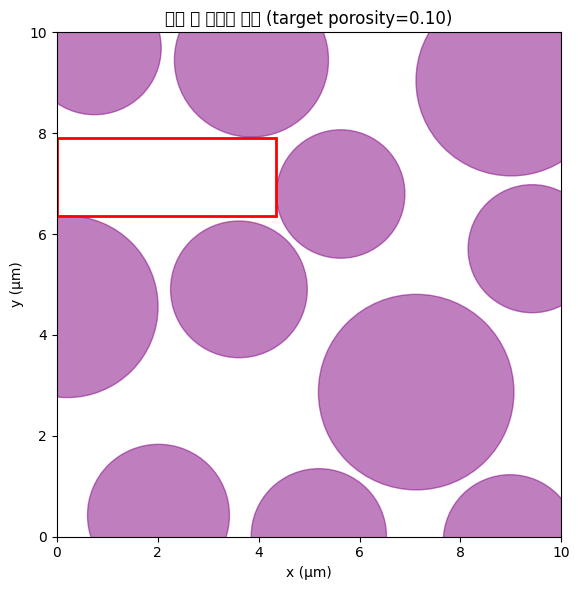

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# ---------------------------------------------------------------
# 1) 원의 면적 계산 함수 (잘린 원 보정 포함)
# ---------------------------------------------------------------
def circle_rect_area(x, y, r, domain_size):
    """
    (x,y) 중심, r 반지름인 원이 domain_size×domain_size 내에
    완전히 들어가면 pi*r^2,
    일부가 나가면 약간 보정하여 pi*r^2*1.05 리턴.
    """
    if 0 <= x - r and x + r <= domain_size and 0 <= y - r and y + r <= domain_size:
        return pi * r**2
    else:
        return pi * r**2 * 1.05




# ---------------------------------------------------------------
# 3) 히스토그램 기반 “최대 빈 직사각형 찾기” 알고리즘
#    (각 행마다 ‘빈 공간 연속 높이’를 히스토그램으로 보고,
#     largest rectangle in histogram 알고리즘 적용)
# ---------------------------------------------------------------
def find_largest_empty_rectangle(binary_map):
    """
    binary_map: 2차원 NumPy 배열 (0=빈 공간, 1=장애물).
    각 행마다 “이전 행까지 쌓인 연속된 0의 개수”를 히스토그램 높이로 보고,
    O(N*M) 시간에 “binary_map 전체에서 가장 넓은 0 직사각형”을 찾습니다.

    반환값:
       (best_row, best_col, best_height, best_width)
       → “가장 큰 직사각형”의 왼쪽 아래 꼭짓점이 (best_row, best_col)이고,
          height=best_height, width=best_width 인 픽셀 단위 정보.
    """
    H, W = binary_map.shape

    # 각 열마다 “지금까지 이어진 연속된 0의 높이”를 저장할 배열
    heights = np.zeros(W, dtype=int)
    best_area = 0
    best_params = (0, 0, 0, 0)  # (행, 열, 높이, 너비)

    for i in range(H):
        # 1) heights 배열 갱신:
        #    binary_map[i,j] == 0 이면 heights[j] += 1, 아니면 0 리셋.
        for j in range(W):
            if binary_map[i, j] == 0:
                heights[j] += 1
            else:
                heights[j] = 0

        # 2) 이 “heights”를 히스토그램으로 보고,
        #    largest rectangle in histogram 알고리즘 수행
        stack = []
        for j in range(W + 1):
            # sentinel: j==W 일 때, height=0 로 가정
            h = heights[j] if j < W else 0
            # 스택이 비지 않았고, 현재 높이<h_top 이면 pop 처리
            while stack and (heights[stack[-1]] > h):
                top = stack.pop()
                height_top = heights[top]
                # 넓이 계산:
                #   right boundary = j - 1,
                #   left boundary  = (stack[-1] + 1) if stack 남아있으면, else 0
                if stack:
                    width_rect = j - stack[-1] - 1
                    col_start = stack[-1] + 1
                else:
                    width_rect = j
                    col_start = 0
                area = height_top * width_rect
                if area > best_area:
                    best_area = area
                    # i 행까지 히스토그램을 본 것이므로, 사각형의 “아래쪽 행”은 (i - height_top + 1)
                    row_start = i - height_top + 1
                    best_params = (row_start, col_start, height_top, width_rect)
            stack.append(j)

    return best_params  # (row_start, col_start, height, width) 픽셀 기준


# ---------------------------------------------------------------
# 4) 메인: 원 배치 후, 격자화 → 빈 사각형 탐색 → 시각화
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(원) 배치 파라미터
    domain_size = 10              # 도메인: 0~10 μm
    target_porosity = 0.1         # 목표 기공률 10%
    np.random.seed(3)

    # (4-2)  원 배치 함수 호출 → (x,y,r) 리스트 얻기
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) “격자 해상도” 설정 (예: 200×200 픽셀)
    grid_size = 200
    H = W = grid_size

    # (4-4) 장애물 맵 생성: 도메인 내 각 픽셀(격자) 중심이
    #       원 안쪽에 속하면 1, 아니면 0.
    obstacle_map = np.zeros((H, W), dtype=np.uint8)
    # 픽셀 하나의 물리적 크기
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            # 이 격자의 중심 좌표(μm 단위)
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            # 모든 원들 중 하나라도 이 점을 포함하면 장애물=1
            for (cx, cy, cr) in lfp_positions:
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    obstacle_map[i, j] = 1
                    break

    # (4-5) obstacle_map 에서 빈 직사각형(0) 중 최대 크기 탐색
    row0, col0, height_pix, width_pix = find_largest_empty_rectangle(obstacle_map)
    # row0, col0 = 사각형의 “왼쪽 아래 꼭짓점”(픽셀 인덱스)
    # height_pix, width_pix = 픽셀 단위 높이/너비

    # (4-6) 픽셀 단위 결과 → 실제 도메인 좌표(μm)로 변환
    x_rect = col0 * dx                     # 사각형 왼쪽 아래 x
    y_rect = row0 * dy                     # 사각형 왼쪽 아래 y
    w_rect = width_pix * dx                # 사각형 너비 (μm)
    h_rect = height_pix * dy               # 사각형 높이(μm)

    print("가장 큰 빈 직사각형(픽셀 기준):", (row0, col0, height_pix, width_pix))
    print(f"실제 좌표(μm): x={x_rect:.2f}, y={y_rect:.2f}, width={w_rect:.2f}, height={h_rect:.2f}")

    # (4-7) 시각화: 원 + 최대 빈 직사각형
    fig, ax = plt.subplots(figsize=(6, 6))

    # • 원( LFP ) 그리기 (보라색, 반투명)
    for (cx, cy, cr) in lfp_positions:
        circ = patches.Circle((cx, cy), cr, color='purple', alpha=0.5)
        ax.add_patch(circ)

    # • 최대 빈 직사각형 그리기 (빨간 테두리, 면색 투명)
    rect = patches.Rectangle(
        (x_rect, y_rect),
        w_rect,
        h_rect,
        linewidth=2,
        edgecolor='red',
        facecolor='none'
    )
    ax.add_patch(rect)

    # • 도메인 축 설정
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (μm)')
    ax.set_ylabel('y (μm)')
    ax.set_title(f"최대 빈 사각형 표시 (target porosity={target_porosity:.2f})")

    plt.tight_layout()
    plt.show()


LFP 배치 위치: (7.12, 2.87), 반지름: 1.94, 기공률: 88.19%
LFP 배치 위치: (9.01, 9.04), 반지름: 1.89, 기공률: 76.43%
LFP 배치 위치: (2.01, 0.42), 반지름: 1.41, 기공률: 69.90%
LFP 배치 위치: (0.20, 4.56), 반지름: 1.80, 기공률: 59.20%
LFP 배치 위치: (3.86, 9.45), 반지름: 1.53, 기공률: 51.50%
LFP 배치 위치: (0.75, 9.69), 반지름: 1.32, 기공률: 45.74%
LFP 배치 위치: (3.61, 4.90), 반지름: 1.36, 기공률: 39.97%
LFP 배치 위치: (9.42, 5.71), 반지름: 1.27, 기공률: 34.65%
LFP 배치 위치: (8.98, -0.09), 반지름: 1.32, 기공률: 28.87%
LFP 배치 위치: (5.63, 6.79), 반지름: 1.27, 기공률: 23.77%
LFP 배치 위치: (5.19, 0.01), 반지름: 1.34, 기공률: 17.84%
Final porosity: 17.84%
찾은 빈 직사각형 1 (픽셀 기준): (np.int64(127), 0, np.int64(31), 87)
실제 좌표(μm): x=0.00, y=6.35, width=4.35, height=1.55
찾은 빈 직사각형 2 (픽셀 기준): (np.int64(37), 34, np.int64(34), 70)
실제 좌표(μm): x=1.70, y=1.85, width=3.50, height=1.70
찾은 빈 직사각형 3 (픽셀 기준): (np.int64(161), 108, np.int64(39), 34)
실제 좌표(μm): x=5.40, y=8.05, width=1.70, height=1.95


<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-33-e0eff8b7c1f5>:113: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layou

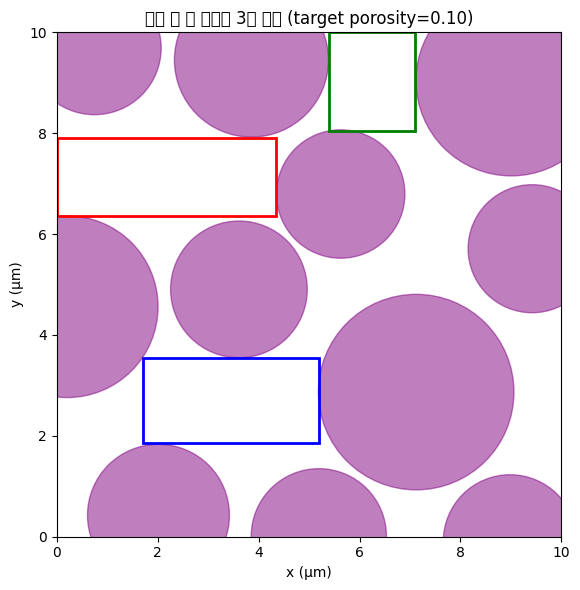

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# 이전에 정의된 circle_rect_area 및 find_largest_empty_rectangle 함수는 여기에 포함되었다고 가정합니다.
# (사용자의 이전 코드를 그대로 사용하시면 됩니다.)
# ... (circle_rect_area 함수 정의) ...
# ... (find_largest_empty_rectangle 함수 정의) ...


# ---------------------------------------------------------------
# 4) 메인: 원 배치 후, 격자화 → 빈 사각형 탐색 → 시각화 (2개 추가)
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(원) 배치 파라미터
    domain_size = 10              # 도메인: 0~10 μm
    target_porosity = 0.1         # 목표 기공률 10%
    np.random.seed(3)

    # (4-2)  원 배치 함수 호출 → (x,y,r) 리스트 얻기
    # increase_radius_to_target_porosity 함수도 이전 셀에 정의되었다고 가정합니다.
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) “격자 해상도” 설정 (예: 200×200 픽셀)
    grid_size = 200
    H = W = grid_size

    # (4-4) 장애물 맵 생성: 도메인 내 각 픽셀(격자) 중심이
    #       원 안쪽에 속하면 1, 아니면 0.
    # find_largest_empty_rectangle 함수가 이 맵을 수정하지 않도록 복사본을 사용합니다.
    initial_obstacle_map = np.zeros((H, W), dtype=np.uint8)
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            for (cx, cy, cr) in lfp_positions:
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    initial_obstacle_map[i, j] = 1
                    break

    # (4-5) 가장 큰 빈 직사각형 3개 찾기
    found_rectangles_pix = []
    current_obstacle_map = initial_obstacle_map.copy() # 맵 복사하여 사용

    for k in range(3): # 가장 큰 사각형 3개 찾기
        row0, col0, height_pix, width_pix = find_largest_empty_rectangle(current_obstacle_map)

        # 찾은 사각형이 유효한 크기인지 확인 (예: 최소 1x1 픽셀)
        if width_pix > 0 and height_pix > 0:
            found_rectangles_pix.append((row0, col0, height_pix, width_pix))

            # 찾은 사각형 영역을 임시로 장애물로 표시하여 다음 탐색에서 제외
            # (이 부분을 1로 채우면 다음번 find_largest_empty_rectangle 호출 시 이 영역은 빈 공간으로 간주되지 않습니다)
            current_obstacle_map[row0 : row0 + height_pix, col0 : col0 + width_pix] = 1
        else:
            # 더 이상 유효한 크기의 빈 사각형이 없으면 중단
            break

    # (4-6) 픽셀 단위 결과 → 실제 도메인 좌표(μm)로 변환
    found_rectangles_mu = []
    for (row0, col0, height_pix, width_pix) in found_rectangles_pix:
        x_rect = col0 * dx
        y_rect = row0 * dy
        w_rect = width_pix * dx
        h_rect = height_pix * dy
        found_rectangles_mu.append((x_rect, y_rect, w_rect, h_rect))

        print(f"찾은 빈 직사각형 {len(found_rectangles_mu)} (픽셀 기준):", (row0, col0, height_pix, width_pix))
        print(f"실제 좌표(μm): x={x_rect:.2f}, y={y_rect:.2f}, width={w_rect:.2f}, height={h_rect:.2f}")


    # (4-7) 시각화: 원 + 가장 큰 빈 직사각형들
    fig, ax = plt.subplots(figsize=(6, 6))

    # • 원( LFP ) 그리기 (보라색, 반투명)
    for (cx, cy, cr) in lfp_positions:
        circ = patches.Circle((cx, cy), cr, color='purple', alpha=0.5)
        ax.add_patch(circ)

    # • 찾은 빈 직사각형들 그리기 (빨간 테두리, 면색 투명)
    colors = ['red', 'blue', 'green'] # 각 사각형에 다른 색상 부여 (선택 사항)
    for i, (x_rect, y_rect, w_rect, h_rect) in enumerate(found_rectangles_mu):
         rect = patches.Rectangle(
            (x_rect, y_rect),
            w_rect,
            h_rect,
            linewidth=2,
            edgecolor=colors[i % len(colors)], # 색상 순환
            facecolor='none'
        )
         ax.add_patch(rect)


    # • 도메인 축 설정
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (μm)')
    ax.set_ylabel('y (μm)')
    ax.set_title(f"가장 큰 빈 사각형 {len(found_rectangles_mu)}개 표시 (target porosity={target_porosity:.2f})")

    plt.tight_layout()
    plt.show()

LFP 배치 위치: (7.12, 2.87), 반지름: 1.94, 기공률: 88.19%
LFP 배치 위치: (9.01, 9.04), 반지름: 1.89, 기공률: 76.43%
LFP 배치 위치: (2.01, 0.42), 반지름: 1.41, 기공률: 69.90%
LFP 배치 위치: (0.20, 4.56), 반지름: 1.80, 기공률: 59.20%
LFP 배치 위치: (3.86, 9.45), 반지름: 1.53, 기공률: 51.50%
LFP 배치 위치: (0.75, 9.69), 반지름: 1.32, 기공률: 45.74%
LFP 배치 위치: (3.61, 4.90), 반지름: 1.36, 기공률: 39.97%
LFP 배치 위치: (9.42, 5.71), 반지름: 1.27, 기공률: 34.65%
LFP 배치 위치: (8.98, -0.09), 반지름: 1.32, 기공률: 28.87%
LFP 배치 위치: (5.63, 6.79), 반지름: 1.27, 기공률: 23.77%
LFP 배치 위치: (5.19, 0.01), 반지름: 1.34, 기공률: 17.84%
Final porosity: 17.84%
찾은 빈 직사각형 1 (픽셀 기준): (np.int64(127), 0, np.int64(31), 87)
실제 좌표(μm): x=0.33, y=6.47, width=3.70, height=1.32
찾은 빈 직사각형 2 (픽셀 기준): (np.int64(37), 34, np.int64(34), 70)
실제 좌표(μm): x=1.96, y=1.98, width=2.98, height=1.45
찾은 빈 직사각형 3 (픽셀 기준): (np.int64(161), 108, np.int64(39), 34)
실제 좌표(μm): x=5.53, y=8.20, width=1.45, height=1.66
찾은 빈 직사각형 4 (픽셀 기준): (np.int64(96), 138, np.int64(51), 25)
실제 좌표(μm): x=6.99, y=4.99, width=1.06, height=2.17


<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-37-75b264e55345>:123: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layou

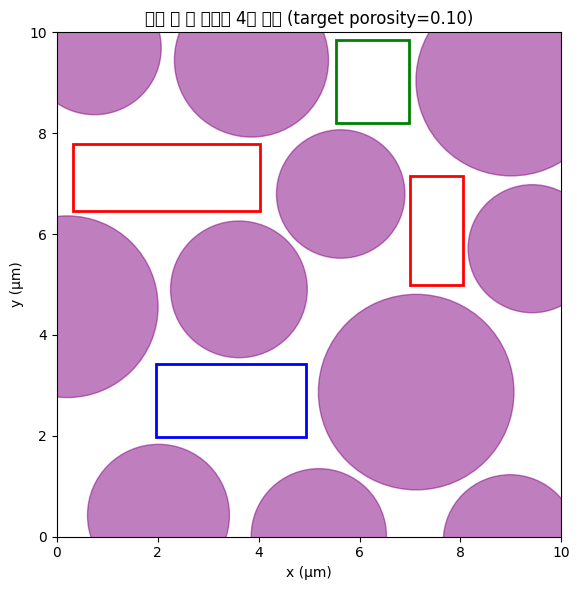

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# 이전에 정의된 circle_rect_area 및 find_largest_empty_rectangle 함수는 여기에 포함되었다고 가정합니다.
# (사용자의 이전 코드를 그대로 사용하시면 됩니다.)
# ... (circle_rect_area 함수 정의) ...
# ... (find_largest_empty_rectangle 함수 정의) ...


# ---------------------------------------------------------------
# 4) 메인: 원 배치 후, 격자화 → 빈 사각형 탐색 → 시각화 (2개 추가)
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(원) 배치 파라미터
    domain_size = 10              # 도메인: 0~10 μm
    target_porosity = 0.1         # 목표 기공률 10%
    np.random.seed(3)

    # (4-2)  원 배치 함수 호출 → (x,y,r) 리스트 얻기
    # increase_radius_to_target_porosity 함수도 이전 셀에 정의되었다고 가정합니다.
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) “격자 해상도” 설정 (예: 200×200 픽셀)
    grid_size = 200
    H = W = grid_size

    # (4-4) 장애물 맵 생성: 도메인 내 각 픽셀(격자) 중심이
    #       원 안쪽에 속하면 1, 아니면 0.
    # find_largest_empty_rectangle 함수가 이 맵을 수정하지 않도록 복사본을 사용합니다.
    initial_obstacle_map = np.zeros((H, W), dtype=np.uint8)
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            for (cx, cy, cr) in lfp_positions:
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    initial_obstacle_map[i, j] = 1
                    break

    # (4-5) 가장 큰 빈 직사각형 3개 찾기
    found_rectangles_pix = []
    current_obstacle_map = initial_obstacle_map.copy() # 맵 복사하여 사용

    for k in range(4): # 가장 큰 사각형 3개 찾기
        row0, col0, height_pix, width_pix = find_largest_empty_rectangle(current_obstacle_map)

        # 찾은 사각형이 유효한 크기인지 확인 (예: 최소 1x1 픽셀)
        if width_pix > 0 and height_pix > 0:
            found_rectangles_pix.append((row0, col0, height_pix, width_pix))

            # 찾은 사각형 영역을 임시로 장애물로 표시하여 다음 탐색에서 제외
            # (이 부분을 1로 채우면 다음번 find_largest_empty_rectangle 호출 시 이 영역은 빈 공간으로 간주되지 않습니다)
            current_obstacle_map[row0 : row0 + height_pix, col0 : col0 + width_pix] = 1
        else:
            # 더 이상 유효한 크기의 빈 사각형이 없으면 중단
            break

    # (4-6) 픽셀 단위 결과 → 실제 도메인 좌표(μm)로 변환 및 크기 조절
    found_rectangles_mu = []
    size_reduction_factor = 0.85 # 예: 너비/높이를 5% 줄임

    for (row0, col0, height_pix, width_pix) in found_rectangles_pix:
        # 원래 크기 계산
        w_rect_orig = width_pix * dx
        h_rect_orig = height_pix * dy

        # 줄어든 크기 계산
        w_rect_reduced = w_rect_orig * size_reduction_factor
        h_rect_reduced = h_rect_orig * size_reduction_factor

        # 크기 줄어든 만큼 시작 위치 조정 (가운데를 기준으로 줄어들도록)
        x_rect = col0 * dx + (w_rect_orig - w_rect_reduced) / 2.0
        y_rect = row0 * dy + (h_rect_orig - h_rect_reduced) / 2.0

        found_rectangles_mu.append((x_rect, y_rect, w_rect_reduced, h_rect_reduced))

        print(f"찾은 빈 직사각형 {len(found_rectangles_mu)} (픽셀 기준):", (row0, col0, height_pix, width_pix))
        print(f"실제 좌표(μm): x={x_rect:.2f}, y={y_rect:.2f}, width={w_rect_reduced:.2f}, height={h_rect_reduced:.2f}")


    # (4-7) 시각화: 원 + 가장 큰 빈 직사각형들
    fig, ax = plt.subplots(figsize=(6, 6))

    # • 원( LFP ) 그리기 (보라색, 반투명)
    for (cx, cy, cr) in lfp_positions:
        circ = patches.Circle((cx, cy), cr, color='purple', alpha=0.5)
        ax.add_patch(circ)

    # • 찾은 빈 직사각형들 그리기 (빨간 테두리, 면색 투명)
    colors = ['red', 'blue', 'green'] # 각 사각형에 다른 색상 부여 (선택 사항)
    for i, (x_rect, y_rect, w_rect, h_rect) in enumerate(found_rectangles_mu):
         rect = patches.Rectangle(
            (x_rect, y_rect),
            w_rect,
            h_rect,
            linewidth=2,
            edgecolor=colors[i % len(colors)], # 색상 순환
            facecolor='none'
        )
         ax.add_patch(rect)


    # • 도메인 축 설정
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (μm)')
    ax.set_ylabel('y (μm)')
    ax.set_title(f"가장 큰 빈 사각형 {len(found_rectangles_mu)}개 표시 (target porosity={target_porosity:.2f})")

    plt.tight_layout()
    plt.show()

LFP 배치 위치: (7.12, 2.87), 반지름: 1.94, 기공률: 88.19%
LFP 배치 위치: (9.01, 9.04), 반지름: 1.89, 기공률: 76.43%
LFP 배치 위치: (2.01, 0.42), 반지름: 1.41, 기공률: 69.90%
LFP 배치 위치: (0.20, 4.56), 반지름: 1.80, 기공률: 59.20%
LFP 배치 위치: (3.86, 9.45), 반지름: 1.53, 기공률: 51.50%
LFP 배치 위치: (0.75, 9.69), 반지름: 1.32, 기공률: 45.74%
LFP 배치 위치: (3.61, 4.90), 반지름: 1.36, 기공률: 39.97%
LFP 배치 위치: (9.42, 5.71), 반지름: 1.27, 기공률: 34.65%
LFP 배치 위치: (8.98, -0.09), 반지름: 1.32, 기공률: 28.87%
LFP 배치 위치: (5.63, 6.79), 반지름: 1.27, 기공률: 23.77%
LFP 배치 위치: (5.19, 0.01), 반지름: 1.34, 기공률: 17.84%
Final porosity: 17.84%
찾은 빈 직사각형 1 (픽셀 기준): (np.int64(127), 0, np.int64(31), 87)
실제 좌표(μm): x=0.33, y=6.47, width=3.70, height=1.32, angle=-3.00도
찾은 빈 직사각형 2 (픽셀 기준): (np.int64(37), 34, np.int64(34), 70)
실제 좌표(μm): x=1.96, y=1.98, width=2.98, height=1.45, angle=-10.00도
찾은 빈 직사각형 3 (픽셀 기준): (np.int64(161), 108, np.int64(39), 34)
실제 좌표(μm): x=5.53, y=8.20, width=1.45, height=1.66, angle=0.00도
찾은 빈 직사각형 4 (픽셀 기준): (np.int64(96), 138, np.int64(51), 25)
실제 좌표(μm): x=6.99,

<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 53360 (\N{HANGUL SYLLABLE KEUN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 44033 (\N{HANGUL SYLLABLE GAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-46-9f5a1f86550a>:134: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layou

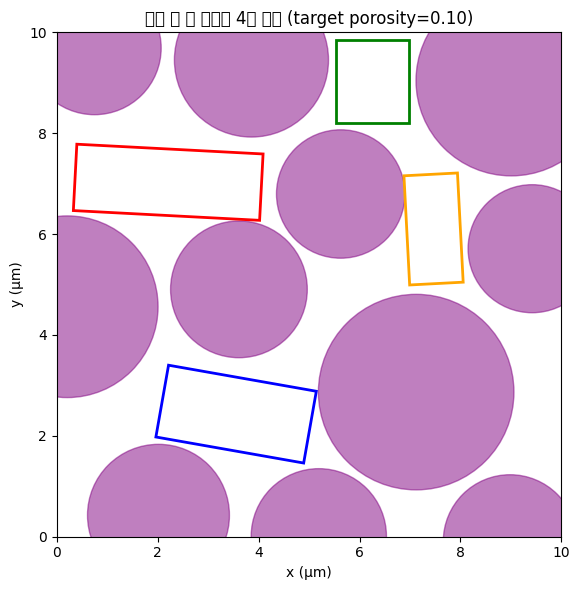

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi

# 이전에 정의된 circle_rect_area 및 find_largest_empty_rectangle 함수는 여기에 포함되었다고 가정합니다.
# (사용자의 이전 코드를 그대로 사용하시면 됩니다.)
# ... (circle_rect_area 함수 정의) ...
# ... (find_largest_empty_rectangle 함수 정의) ...


# ---------------------------------------------------------------
# 4) 메인: 원 배치 후, 격자화 → 빈 사각형 탐색 → 시각화 (2개 추가)
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(원) 배치 파라미터
    domain_size = 10              # 도메인: 0~10 μm
    target_porosity = 0.1         # 목표 기공률 10%
    np.random.seed(3)

    # (4-2)  원 배치 함수 호출 → (x,y,r) 리스트 얻기
    # increase_radius_to_target_porosity 함수도 이전 셀에 정의되었다고 가정합니다.
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) “격자 해상도” 설정 (예: 200×200 픽셀)
    grid_size = 200
    H = W = grid_size

    # (4-4) 장애물 맵 생성: 도메인 내 각 픽셀(격자) 중심이
    #       원 안쪽에 속하면 1, 아니면 0.
    # find_largest_empty_rectangle 함수가 이 맵을 수정하지 않도록 복사본을 사용합니다.
    initial_obstacle_map = np.zeros((H, W), dtype=np.uint8)
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            for (cx, cy, cr) in lfp_positions:
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    initial_obstacle_map[i, j] = 1
                    break

    # (4-5) 가장 큰 빈 직사각형 3개 찾기
    found_rectangles_pix = []
    current_obstacle_map = initial_obstacle_map.copy() # 맵 복사하여 사용

    # 4개까지 찾도록 수정 (첫 번째, 두 번째, 세 번째 빈 공간 확보를 위해)
    for k in range(4):
        row0, col0, height_pix, width_pix = find_largest_empty_rectangle(current_obstacle_map)

        # 찾은 사각형이 유효한 크기인지 확인 (예: 최소 1x1 픽셀)
        if width_pix > 0 and height_pix > 0:
            found_rectangles_pix.append((row0, col0, height_pix, width_pix))

            # 찾은 사각형 영역을 임시로 장애물로 표시하여 다음 탐색에서 제외
            current_obstacle_map[row0 : row0 + height_pix, col0 : col0 + width_pix] = 1
        else:
            # 더 이상 유효한 크기의 빈 사각형이 없으면 중단
            break

    # (4-6) 픽셀 단위 결과 → 실제 도메인 좌표(μm)로 변환 및 크기 조절, 회전 각도 할당
    found_rectangles_mu = []
    size_reduction_factor = 0.85 # 예: 너비/높이를 5% 줄임

    # 각 사각형에 적용할 회전 각도 리스트 (찾는 사각형 개수와 맞게 설정)
    # 예시: 첫 번째 사각형은 5도, 두 번째는 10도, 세 번째는 0도, 네 번째는 -5도 회전
    rotation_angles_deg = [-3, -10, 0, 3]

    for i, (row0, col0, height_pix, width_pix) in enumerate(found_rectangles_pix):
        # 원래 크기 계산
        w_rect_orig = width_pix * dx
        h_rect_orig = height_pix * dy

        # 줄어든 크기 계산
        w_rect_reduced = w_rect_orig * size_reduction_factor
        h_rect_reduced = h_rect_orig * size_reduction_factor

        # 크기 줄어든 만큼 시작 위치 조정 (가운데를 기준으로 줄어들도록)
        x_rect = col0 * dx + (w_rect_orig - w_rect_reduced) / 2.0
        y_rect = row0 * dy + (h_rect_orig - h_rect_reduced) / 2.0

        # 현재 사각형에 적용할 회전 각도 가져오기 (리스트 길이 벗어나지 않게 처리)
        angle_to_apply = rotation_angles_deg[i % len(rotation_angles_deg)]


        found_rectangles_mu.append((x_rect, y_rect, w_rect_reduced, h_rect_reduced, angle_to_apply))

        print(f"찾은 빈 직사각형 {len(found_rectangles_mu)} (픽셀 기준):", (row0, col0, height_pix, width_pix))
        print(f"실제 좌표(μm): x={x_rect:.2f}, y={y_rect:.2f}, width={w_rect_reduced:.2f}, height={h_rect_reduced:.2f}, angle={angle_to_apply:.2f}도")


    # (4-7) 시각화: 원 + 가장 큰 빈 직사각형들 (회전 적용)
    fig, ax = plt.subplots(figsize=(6, 6))

    # • 원( LFP ) 그리기 (보라색, 반투명)
    for (cx, cy, cr) in lfp_positions:
        circ = patches.Circle((cx, cy), cr, color='purple', alpha=0.5)
        ax.add_patch(circ)

    # • 찾은 빈 직사각형들 그리기 (빨간 테두리, 면색 투명)
    colors = ['red', 'blue', 'green', 'orange'] # 각 사각형에 다른 색상 부여 (찾는 사각형 개수와 맞게)

    # found_rectangles_mu 리스트에 회전 각도 정보가 추가되었으므로 구조 변경
    for i, (x_rect, y_rect, w_rect, h_rect, angle_to_apply) in enumerate(found_rectangles_mu):
         rect = patches.Rectangle(
            (x_rect, y_rect),
            w_rect,
            h_rect,
            linewidth=2,
            edgecolor=colors[i % len(colors)], # 색상 순환
            facecolor='none',
            angle=angle_to_apply # 개별 회전 각도 적용
        )
         ax.add_patch(rect)


    # • 도메인 축 설정
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (μm)')
    ax.set_ylabel('y (μm)')
    ax.set_title(f"가장 큰 빈 사각형 {len(found_rectangles_mu)}개 표시 (target porosity={target_porosity:.2f})")

    plt.tight_layout()
    plt.show()

LFP 배치 위치: (7.12, 2.87), 반지름: 1.94, 기공률: 88.19%
LFP 배치 위치: (9.01, 9.04), 반지름: 1.89, 기공률: 76.43%
LFP 배치 위치: (2.01, 0.42), 반지름: 1.41, 기공률: 69.90%
LFP 배치 위치: (0.20, 4.56), 반지름: 1.80, 기공률: 59.20%
LFP 배치 위치: (3.86, 9.45), 반지름: 1.53, 기공률: 51.50%
LFP 배치 위치: (0.75, 9.69), 반지름: 1.32, 기공률: 45.74%
LFP 배치 위치: (3.61, 4.90), 반지름: 1.36, 기공률: 39.97%
LFP 배치 위치: (9.42, 5.71), 반지름: 1.27, 기공률: 34.65%
LFP 배치 위치: (8.98, -0.09), 반지름: 1.32, 기공률: 28.87%
LFP 배치 위치: (5.63, 6.79), 반지름: 1.27, 기공률: 23.77%
LFP 배치 위치: (5.19, 0.01), 반지름: 1.34, 기공률: 17.84%
Final porosity: 17.84%
찾은 빈 직사각형 1 (픽셀 기준): (np.int64(127), 0, np.int64(31), 87)
실제 좌표(μm): x=0.11, y=6.39, width=4.13, height=1.47, angle=-3.00도
찾은 빈 직사각형 2 (픽셀 기준): (np.int64(37), 34, np.int64(34), 70)
실제 좌표(μm): x=1.79, y=1.89, width=3.32, height=1.61, angle=-3.00도
찾은 빈 직사각형 3 (픽셀 기준): (np.int64(161), 108, np.int64(39), 34)
실제 좌표(μm): x=5.44, y=8.10, width=1.61, height=1.85, angle=0.00도
찾은 빈 직사각형 4 (픽셀 기준): (np.int64(96), 138, np.int64(51), 25)
실제 좌표(μm): x=6.93, 

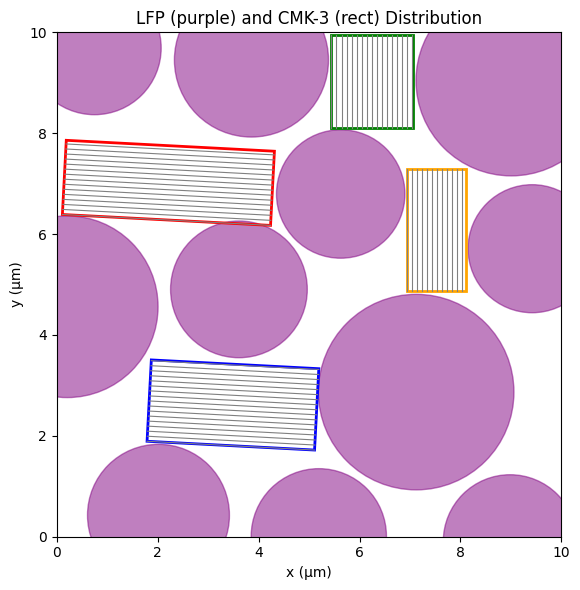

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi, cos, sin, radians

# 이전에 정의된 circle_rect_area 및 find_largest_empty_rectangle 함수는 여기에 포함되었다고 가정합니다.
# (사용자의 이전 코드를 그대로 사용하시면 됩니다.)
# ... (circle_rect_area 함수 정의) ...
# ... (find_largest_empty_rectangle 함수 정의) ...


# ---------------------------------------------------------------
# 4) 메인: 원 배치 후, 격자화 → 빈 사각형 탐색 → 시각화 (2개 추가)
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(원) 배치 파라미터
    domain_size = 10              # 도메인: 0~10 μm
    target_porosity = 0.1         # 목표 기공률 10%
    np.random.seed(3)

    # (4-2)  원 배치 함수 호출 → (x,y,r) 리스트 얻기
    # increase_radius_to_target_porosity 함수도 이전 셀에 정의되었다고 가정합니다.
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) “격자 해상도” 설정 (예: 200×200 픽셀)
    grid_size = 200
    H = W = grid_size

    # (4-4) 장애물 맵 생성: 도메인 내 각 픽셀(격자) 중심이
    #       원 안쪽에 속하면 1, 아니면 0.
    # find_largest_empty_rectangle 함수가 이 맵을 수정하지 않도록 복사본을 사용합니다.
    initial_obstacle_map = np.zeros((H, W), dtype=np.uint8)
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            for (cx, cy, cr) in lfp_positions:
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    initial_obstacle_map[i, j] = 1
                    break

    # (4-5) 가장 큰 빈 직사각형 3개 찾기
    found_rectangles_pix = []
    current_obstacle_map = initial_obstacle_map.copy() # 맵 복사하여 사용

    # 4개까지 찾도록 수정 (첫 번째, 두 번째, 세 번째 빈 공간 확보를 위해)
    for k in range(4):
        row0, col0, height_pix, width_pix = find_largest_empty_rectangle(current_obstacle_map)

        # 찾은 사각형이 유효한 크기인지 확인 (예: 최소 1x1 픽셀)
        if width_pix > 0 and height_pix > 0:
            found_rectangles_pix.append((row0, col0, height_pix, width_pix))

            # 찾은 사각형 영역을 임시로 장애물로 표시하여 다음 탐색에서 제외
            current_obstacle_map[row0 : row0 + height_pix, col0 : col0 + width_pix] = 1
        else:
            # 더 이상 유효한 크기의 빈 사각형이 없으면 중단
            break

    # (4-6) 픽셀 단위 결과 → 실제 도메인 좌표(μm)로 변환 및 크기 조절, 회전 각도 할당
    found_rectangles_mu = []
    size_reduction_factor = 0.95 # 예: 너비/높이를 15% 줄임 (이전 요청값 적용)

    # 각 사각형에 적용할 회전 각도 리스트 (이전 요청값 적용)
    # 예시: 첫 번째 사각형은 -3도, 두 번째는 -10도, 세 번째는 0도, 네 번째는 3도 회전
    rotation_angles_deg = [-3, -3, 0, 0]

    for i, (row0, col0, height_pix, width_pix) in enumerate(found_rectangles_pix):
        # 원래 크기 계산
        w_rect_orig = width_pix * dx
        h_rect_orig = height_pix * dy

        # 줄어든 크기 계산
        w_rect_reduced = w_rect_orig * size_reduction_factor
        h_rect_reduced = h_rect_orig * size_reduction_factor

        # 크기 줄어든 만큼 시작 위치 조정 (가운데를 기준으로 줄어들도록)
        x_rect_bottom_left = col0 * dx + (w_rect_orig - w_rect_reduced) / 2.0
        y_rect_bottom_left = row0 * dy + (h_rect_orig - h_rect_reduced) / 2.0

        # 현재 사각형에 적용할 회전 각도 가져오기 (리스트 길이 벗어나지 않게 처리)
        angle_to_apply_deg = rotation_angles_deg[i % len(rotation_angles_deg)]

        found_rectangles_mu.append((x_rect_bottom_left, y_rect_bottom_left, w_rect_reduced, h_rect_reduced, angle_to_apply_deg))

        print(f"찾은 빈 직사각형 {len(found_rectangles_mu)} (픽셀 기준):", (row0, col0, height_pix, width_pix))
        print(f"실제 좌표(μm): x={x_rect_bottom_left:.2f}, y={y_rect_bottom_left:.2f}, width={w_rect_reduced:.2f}, height={h_rect_reduced:.2f}, angle={angle_to_apply_deg:.2f}도")


    # (4-7) 시각화: 원 + 가장 큰 빈 직사각형들 (회전 적용) + 내부 선분
    fig, ax = plt.subplots(figsize=(6, 6))

    # • 원( LFP ) 그리기 (보라색, 반투명)
    for (cx, cy, cr) in lfp_positions:
        circ = patches.Circle((cx, cy), cr, color='purple', alpha=0.5)
        ax.add_patch(circ)

    # • 찾은 빈 직사각형들 그리기 (테두리) 및 내부 선분 그리기
    colors = ['red', 'blue', 'green', 'orange'] # 각 사각형에 다른 색상 부여
    line_color = 'gray' # 선분 색상
    line_linewidth = 0.8 # 선분 두께
    line_spacing = 0.1 # 선분 간 간격 (μm 단위)

    # found_rectangles_mu 리스트에 회전 각도 정보가 추가되었으므로 구조 변경
    for i, (x_rect_bl, y_rect_bl, w_rect, h_rect, angle_to_apply_deg) in enumerate(found_rectangles_mu):

        # 1. 직사각형 테두리 그리기
        rect = patches.Rectangle(
            (x_rect_bl, y_rect_bl),
            w_rect,
            h_rect,
            linewidth=2,
            edgecolor=colors[i % len(colors)], # 색상 순환
            facecolor='none',
            angle=angle_to_apply_deg
        )
        ax.add_patch(rect)

        # 2. 직사각형 내부 선분 그리기
        # 회전 각도를 라디안으로 변환
        angle_rad = radians(angle_to_apply_deg)

        # 직사각형의 긴 변과 짧은 변 판단
        if w_rect >= h_rect:
            # 너비가 더 길거나 같으면, 높이 방향으로 선분 배치
            longer_side_len = w_rect
            shorter_side_len = h_rect
            # 선분은 긴 변(너비)에 평행하게 그려짐
            # 시작점 기준: 짧은 변(높이)의 0부터 끝까지 선분 배치
            num_lines = int(shorter_side_len / line_spacing)
            # 선분 시작점과 끝점 계산
            for k in range(num_lines + 1):
                # 짧은 변 방향으로 이동할 거리
                dist_along_shorter = k * line_spacing
                if k * line_spacing > shorter_side_len: # 마지막 선분이 너무 길면 조절
                    dist_along_shorter = shorter_side_len

                # 선분의 시작점 (짧은 변의 한쪽 끝에서 dist_along_shorter 만큼 이동한 점)
                # 회전 변환 적용: (x', y') = (x*cos - y*sin, x*sin + y*cos)
                # 사각형 왼쪽 아래 꼭짓점 (x_rect_bl, y_rect_bl)을 원점으로 생각
                start_x_local = 0
                start_y_local = dist_along_shorter
                # 회전된 로컬 시작점
                rotated_start_x_local = start_x_local * cos(angle_rad) - start_y_local * sin(angle_rad)
                rotated_start_y_local = start_x_local * sin(angle_rad) + start_y_local * cos(angle_rad)
                # 실제 도메인 좌표에서의 시작점
                start_x = x_rect_bl + rotated_start_x_local
                start_y = y_rect_bl + rotated_start_y_local

                # 선분의 끝점 (시작점에서 긴 변(너비) 길이만큼 이동한 점)
                end_x_local = longer_side_len
                end_y_local = dist_along_shorter # 짧은 변 방향 이동 거리는 동일
                 # 회전된 로컬 끝점
                rotated_end_x_local = end_x_local * cos(angle_rad) - end_y_local * sin(angle_rad)
                rotated_end_y_local = end_x_local * sin(angle_rad) + end_y_local * cos(angle_rad)
                # 실제 도메인 좌표에서의 끝점
                end_x = x_rect_bl + rotated_end_x_local
                end_y = y_rect_bl + rotated_end_y_local

                # 선분 그리기
                ax.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=line_linewidth)


        else:
            # 높이가 더 길면, 너비 방향으로 선분 배치
            longer_side_len = h_rect
            shorter_side_len = w_rect
            # 선분은 긴 변(높이)에 평행하게 그려짐
            # 시작점 기준: 짧은 변(너비)의 0부터 끝까지 선분 배치
            num_lines = int(shorter_side_len / line_spacing)
            # 선분 시작점과 끝점 계산
            for k in range(num_lines + 1):
                 # 짧은 변 방향(너비)으로 이동할 거리
                dist_along_shorter = k * line_spacing
                if k * line_spacing > shorter_side_len: # 마지막 선분이 너무 길면 조절
                    dist_along_shorter = shorter_side_len

                # 선분의 시작점 (짧은 변(너비)의 한쪽 끝에서 dist_along_shorter 만큼 이동한 점)
                # 회전 변환 적용: (x', y') = (x*cos - y*sin, x*sin + y*cos)
                # 사각형 왼쪽 아래 꼭짓점 (x_rect_bl, y_rect_bl)을 원점으로 생각
                start_x_local = dist_along_shorter
                start_y_local = 0
                 # 회전된 로컬 시작점
                rotated_start_x_local = start_x_local * cos(angle_rad) - start_y_local * sin(angle_rad)
                rotated_start_y_local = start_x_local * sin(angle_rad) + start_y_local * cos(angle_rad)
                 # 실제 도메인 좌표에서의 시작점
                start_x = x_rect_bl + rotated_start_x_local
                start_y = y_rect_bl + rotated_start_y_local


                # 선분의 끝점 (시작점에서 긴 변(높이) 길이만큼 이동한 점)
                end_x_local = dist_along_shorter # 짧은 변 방향 이동 거리는 동일
                end_y_local = longer_side_len
                 # 회전된 로컬 끝점
                rotated_end_x_local = end_x_local * cos(angle_rad) - end_y_local * sin(angle_rad)
                rotated_end_y_local = end_x_local * sin(angle_rad) + end_y_local * cos(angle_rad)
                # 실제 도메인 좌표에서의 끝점
                end_x = x_rect_bl + rotated_end_x_local
                end_y = y_rect_bl + rotated_end_y_local


                # 선분 그리기
                ax.plot([start_x, end_x], [start_y, end_y], color=line_color, linewidth=line_linewidth)


    # • 도메인 축 설정
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlabel('x (μm)')
    ax.set_ylabel('y (μm)')
    ax.set_title(f"LFP (purple) and CMK-3 (rect) Distribution")

    plt.tight_layout()
    plt.show()

LFP 배치 위치: (7.12, 2.87), 반지름: 1.94, 기공률: 88.19%
LFP 배치 위치: (9.01, 9.04), 반지름: 1.89, 기공률: 76.43%
LFP 배치 위치: (2.01, 0.42), 반지름: 1.41, 기공률: 69.90%
LFP 배치 위치: (0.20, 4.56), 반지름: 1.80, 기공률: 59.20%
LFP 배치 위치: (3.86, 9.45), 반지름: 1.53, 기공률: 51.50%
LFP 배치 위치: (0.75, 9.69), 반지름: 1.32, 기공률: 45.74%
LFP 배치 위치: (3.61, 4.90), 반지름: 1.36, 기공률: 39.97%
LFP 배치 위치: (9.42, 5.71), 반지름: 1.27, 기공률: 34.65%
LFP 배치 위치: (8.98, -0.09), 반지름: 1.32, 기공률: 28.87%
LFP 배치 위치: (5.63, 6.79), 반지름: 1.27, 기공률: 23.77%
LFP 배치 위치: (5.19, 0.01), 반지름: 1.34, 기공률: 17.84%
Final porosity: 17.84%
찾은 빈 직사각형 1 (픽셀 기준): (np.int64(127), 0, np.int64(31), 87)
실제 좌표(μm): x=0.00, y=6.35, width=4.35, height=1.55, angle=-3.00도
찾은 빈 직사각형 2 (픽셀 기준): (np.int64(37), 34, np.int64(34), 70)
실제 좌표(μm): x=1.70, y=1.85, width=3.50, height=1.70, angle=-3.00도
찾은 빈 직사각형 3 (픽셀 기준): (np.int64(161), 108, np.int64(39), 34)
실제 좌표(μm): x=5.40, y=8.05, width=1.70, height=1.95, angle=-1.00도
찾은 빈 직사각형 4 (픽셀 기준): (np.int64(96), 138, np.int64(51), 25)
실제 좌표(μm): x=6.90,

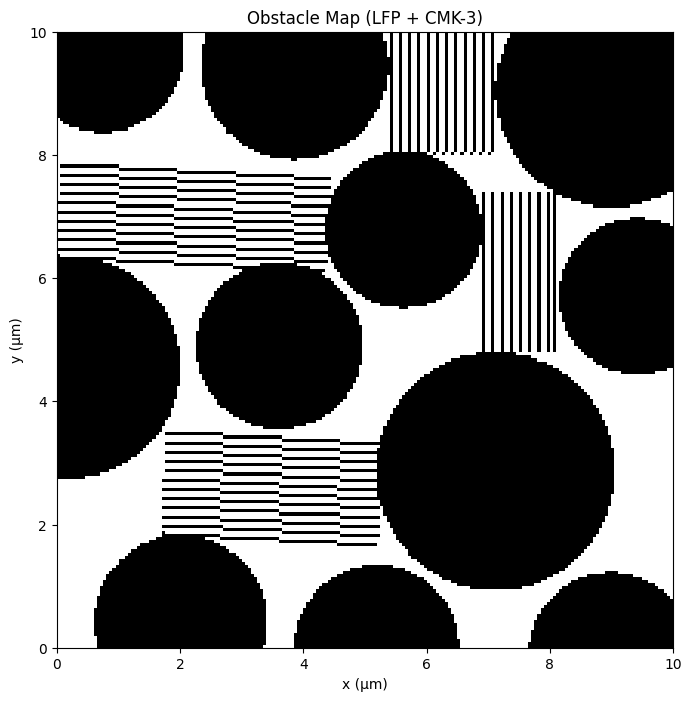

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from math import pi, cos, sin, radians

# 이전에 정의된 circle_rect_area 및 find_largest_empty_rectangle 함수는 여기에 포함되었다고 가정합니다.
# (사용자의 이전 코드를 그대로 사용하시면 됩니다.)
# ... (circle_rect_area 함수 정의) ...
# ... (find_largest_empty_rectangle 함수 정의) ...


# ---------------------------------------------------------------
# 4) 메인: 원 배치 후, 격자화 → 빈 사각형 탐색 → 시각화 (2개 추가)
# ---------------------------------------------------------------
if __name__ == "__main__":
    # (4-1)  LFP(원) 배치 파라미터
    domain_size = 10              # 도메인: 0~10 μm
    target_porosity = 0.1         # 목표 기공률 10%
    np.random.seed(3)

    # (4-2)  원 배치 함수 호출 → (x,y,r) 리스트 얻기
    # increase_radius_to_target_porosity 함수도 이전 셀에 정의되었다고 가정합니다.
    lfp_positions = increase_radius_to_target_porosity(
        domain_size=domain_size,
        min_r_LFP=1.25,
        max_r_LFP=2.5,
        target_porosity=target_porosity,
        max_attempts=10000
    )

    # (4-3) “격자 해상도” 설정 (예: 200×200 픽셀)
    grid_size = 200
    H = W = grid_size

    # (4-4) 장애물 맵 생성: 도메인 내 각 픽셀(격자) 중심이
    #       원 안쪽에 속하면 1, 아니면 0.
    # find_largest_empty_rectangle 함수가 이 맵을 수정하지 않도록 복사본을 사용합니다.
    initial_obstacle_map = np.zeros((H, W), dtype=np.uint8)
    dx = domain_size / W
    dy = domain_size / H

    for i in range(H):
        for j in range(W):
            x_center = (j + 0.5) * dx
            y_center = (i + 0.5) * dy

            for (cx, cy, cr) in lfp_positions:
                # 픽셀 중심이 원 안에 있는지 확인
                if (x_center - cx)**2 + (y_center - cy)**2 <= cr**2:
                    initial_obstacle_map[i, j] = 1
                    break # 이 픽셀은 이미 장애물로 표시됨

    # (4-5) 가장 큰 빈 직사각형 3개 찾기
    found_rectangles_pix = []
    current_obstacle_map = initial_obstacle_map.copy() # 맵 복사하여 사용

    # 4개까지 찾도록 수정
    for k in range(4):
        row0, col0, height_pix, width_pix = find_largest_empty_rectangle(current_obstacle_map)

        # 찾은 사각형이 유효한 크기인지 확인
        if width_pix > 0 and height_pix > 0:
            found_rectangles_pix.append((row0, col0, height_pix, width_pix))

            # 찾은 사각형 영역을 임시로 장애물로 표시하여 다음 탐색에서 제외
            current_obstacle_map[row0 : row0 + height_pix, col0 : col0 + width_pix] = 1
        else:
            # 더 이상 유효한 크기의 빈 사각형이 없으면 중단
            break

    # (4-6) 픽셀 단위 결과 → 실제 도메인 좌표(μm)로 변환 및 크기 조절, 회전 각도 할당
    found_rectangles_mu = []
    size_reduction_factor = 1 # 이전 요청값 적용

    # 각 사각형에 적용할 회전 각도 리스트 (이전 요청값 적용)
    rotation_angles_deg = [-3, -3, -1, 0]

    for i, (row0, col0, height_pix, width_pix) in enumerate(found_rectangles_pix):
        # 원래 크기 계산
        w_rect_orig = width_pix * dx
        h_rect_orig = height_pix * dy

        # 줄어든 크기 계산
        w_rect_reduced = w_rect_orig * size_reduction_factor
        h_rect_reduced = h_rect_orig * size_reduction_factor # Corrected variable name

        # 크기 줄어든 만큼 시작 위치 조정 (가운데를
        # 기준으로 줄어들도록)
        x_rect_bottom_left = col0 * dx + (w_rect_orig - w_rect_reduced) / 2.0
        y_rect_bottom_left = row0 * dy + (h_rect_orig - h_rect_reduced) / 2.0

        # 현재 사각형에 적용할 회전 각도 가져오기 (리스트 길이 벗어나지 않게 처리)
        angle_to_apply_deg = rotation_angles_deg[i % len(rotation_angles_deg)]

        found_rectangles_mu.append((x_rect_bottom_left, y_rect_bottom_left, w_rect_reduced, h_rect_reduced, angle_to_apply_deg))

        print(f"찾은 빈 직사각형 {len(found_rectangles_mu)} (픽셀 기준):", (row0, col0, height_pix, width_pix))
        print(f"실제 좌표(μm): x={x_rect_bottom_left:.2f}, y={y_rect_bottom_left:.2f}, width={w_rect_reduced:.2f}, height={h_rect_reduced:.2f}, angle={angle_to_apply_deg:.2f}도")


    # (4-7) 최종 obstacle map 생성 및 시각화
    # initial_obstacle_map을 기반으로 시작합니다 (LFP 원 포함)
    final_obstacle_map = initial_obstacle_map.copy()

    # 선분 간 간격 (μm 단위) 및 선분 두께 (픽셀 단위로 간주)
    line_spacing = 0.15 # μm
    line_pixel_thickness = 1 # 픽셀 단위로 선분의 두께 설정

    # 각 직사각형과 내부 선분을 final_obstacle_map에 그리기
    for i, (x_rect_bl, y_rect_bl, w_rect, h_rect, angle_to_apply_deg) in enumerate(found_rectangles_mu):

        # 회전 각도를 라디안으로 변환
        angle_rad = radians(angle_to_apply_deg)

        # 직사각형 테두리 그리기 (두께를 고려하여 맵에 표시)
        # Note: 정확한 회전된 직사각형 테두리를 픽셀 단위로 맵에 그리는 것은 복잡합니다.
        # 여기서는 단순화를 위해 사각형의 AABB (Axis-Aligned Bounding Box)를 기준으로
        # 맵을 업데이트하거나, 각 픽셀 중심이 회전된 사각형 내부에 있는지 판단해야 합니다.
        # 더 정확한 방법은 각 픽셀이 회전된 사각형의 경로에 얼마나 가까운지 계산하는 것입니다.
        # 여기서는 편의상 사각형 내부 전체를 채우는 방식으로 구현합니다.
        # (원래 목적이 빈 공간 찾는 것이므로, 채워도 무방할 수 있습니다.)

        # 간략화된 방법: 사각형 내부 픽셀을 모두 1로 채웁니다.
        # 더 정밀하게 하려면 각 픽셀이 회전된 사각형의 내부인지 판별하는 로직 필요
        # 여기서는 find_largest_empty_rectangle에서 사용한 픽셀 영역을 다시 활용 (크기 줄인 후)
        # 픽셀 좌표로 변환
        col0 = int(x_rect_bl / dx)
        row0 = int(y_rect_bl / dy)
        width_pix = int(w_rect / dx)
        height_pix = int(h_rect / dy)

        # 맵 범위 벗어나지 않도록 클리핑
        col_end = min(col0 + width_pix, W)
        row_end = min(row0 + height_pix, H)
        col0 = max(0, col0)
        row0 = max(0, row0)

        # 줄어든 사각형 영역을 맵에 표시 (회전은 시각화에서만 적용)
        # final_obstacle_map[row0:row_end, col0:col_end] = 1
        # Note: 이 방식은 회전을 고려하지 못하므로, 아래 선분 그리는 방식과 유사하게 픽셀 단위로 판단해야 함

        # 각 픽셀의 중심이 회전된 사각형 내부에 있는지 더 정확히 판단하는 로직 (주석 처리)
        # rect_center_x = x_rect_bl + w_rect / 2.0
        # rect_center_y = y_rect_bl + h_rect / 2.0
        # for r in range(H):
        #     for c in range(W):
        #         pixel_center_x = (c + 0.5) * dx
        #         pixel_center_y = (r + 0.5) * dy
        #         # 픽셀 중심을 사각형 중심으로 이동
        #         translated_x = pixel_center_x - rect_center_x
        #         translated_y = pixel_center_y - rect_center_y
        #         # 역회전 (픽셀을 회전되지 않은 사각형의 좌표계로 변환)
        #         inv_angle_rad = -angle_rad
        #         rotated_x = translated_x * cos(inv_angle_rad) - translated_y * sin(inv_angle_rad)
        #         rotated_y = translated_x * sin(inv_angle_rad) + translated_y * cos(inv_angle_rad)
        #         # 회전되지 않은 사각형의 AABB 내부에 있는지 확인
        #         if -w_rect/2.0 <= rotated_x <= w_rect/2.0 and -h_rect/2.0 <= rotated_y <= h_rect/2.0:
        #              final_obstacle_map[r, c] = 1


        # 선분 그리기 (픽셀 단위로 맵에 표시)
        # 선분은 사각형의 긴 변에 평행하게 그려짐
        if w_rect >= h_rect:
            # 너비가 더 길거나 같으면, 높이 방향으로 선분 배치
            shorter_side_len = h_rect
            num_lines = int(shorter_side_len / line_spacing)

            for k in range(num_lines + 1):
                dist_along_shorter = k * line_spacing
                # if k * line_spacing > shorter_side_len: # 마지막 선분이 너무 길면 조절 (선분 끝점이 사각형 경계를 벗어나지 않도록 해야 함)
                #     dist_along_shorter = shorter_side_len # 이 로직은 선분 끝점을 정확히 맞추는 데 사용되지만, 맵 그리기에서는 픽셀 단위 판단으로 대체

                # 선분의 시작점 (로컬 좌표)
                start_x_local = 0
                start_y_local = dist_along_shorter

                # 선분의 끝점 (로컬 좌표)
                end_x_local = w_rect # 긴 변 길이 (너비)
                end_y_local = dist_along_shorter

                # 선분을 따라 픽셀을 찍기 위해 선분의 물리적 길이를 계산
                line_physical_length = w_rect

                # 선분 위에 있는 각 픽셀을 판단
                # 시작점에서 끝점까지 일정한 스텝으로 이동하며 해당 픽셀을 맵에 표시
                num_points = max(2, int(line_physical_length / (min(dx, dy) / line_pixel_thickness))) # 선분 길이 / (픽셀 해상도 / 선분 두께)
                for step in range(num_points + 1):
                    t = step / num_points # 0부터 1까지 변화하는 비율

                    # 선분 위의 현재 점 (로컬 좌표)
                    current_x_local = start_x_local + t * (end_x_local - start_x_local)
                    current_y_local = start_y_local + t * (end_y_local - start_y_local)

                    # 회전 변환 적용
                    rotated_x_local = current_x_local * cos(angle_rad) - current_y_local * sin(angle_rad)
                    rotated_y_local = current_x_local * sin(angle_rad) + current_y_local * cos(angle_rad)

                    # 실제 도메인 좌표
                    current_x_mu = x_rect_bl + rotated_x_local
                    current_y_mu = y_rect_bl + rotated_y_local

                    # 해당 점이 속한 픽셀 좌표 계산
                    pixel_col = int(current_x_mu / dx)
                    pixel_row = int(current_y_mu / dy)

                    # 맵 범위 벗어나지 않도록 확인하고 맵에 표시
                    if 0 <= pixel_row < H and 0 <= pixel_col < W:
                        final_obstacle_map[pixel_row, pixel_col] = 1

        else:
            # 높이가 더 길면, 너비 방향으로 선분 배치
            shorter_side_len = w_rect
            num_lines = int(shorter_side_len / line_spacing)

            for k in range(num_lines + 1):
                dist_along_shorter = k * line_spacing
                 # if k * line_spacing > shorter_side_len: # 마지막 선분이 너무 길면 조절
                #     dist_along_shorter = shorter_side_len

                # 선분의 시작점 (로컬 좌표)
                start_x_local = dist_along_shorter
                start_y_local = 0

                # 선분의 끝점 (로컬 좌표)
                end_x_local = dist_along_shorter
                end_y_local = h_rect # 긴 변 길이 (높이)

                # 선분을 따라 픽셀을 찍기 위해 선분의 물리적 길이를 계산
                line_physical_length = h_rect

                 # 선분 위에 있는 각 픽셀을 판단
                num_points = max(2, int(line_physical_length / (min(dx, dy) / line_pixel_thickness)))
                for step in range(num_points + 1):
                    t = step / num_points # 0부터 1까지 변화하는 비율

                    # 선분 위의 현재 점 (로컬 좌표)
                    current_x_local = start_x_local + t * (end_x_local - start_x_local)
                    current_y_local = start_y_local + t * (end_y_local - start_y_local)

                     # 회전 변환 적용
                    rotated_x_local = current_x_local * cos(angle_rad) - current_y_local * sin(angle_rad)
                    rotated_y_local = current_x_local * sin(angle_rad) + current_y_local * cos(angle_rad)

                    # 실제 도메인 좌표
                    current_x_mu = x_rect_bl + rotated_x_local
                    current_y_mu = y_rect_bl + rotated_y_local

                    # 해당 점이 속한 픽셀 좌표 계산
                    pixel_col = int(current_x_mu / dx)
                    pixel_row = int(current_y_mu / dy)

                    # 맵 범위 벗어나지 않도록 확인하고 맵에 표시
                    if 0 <= pixel_row < H and 0 <= pixel_col < W:
                        final_obstacle_map[pixel_row, pixel_col] = 1


    # (4-8) 최종 장애물 맵 시각화
    plt.figure(figsize=(8, 8))
    # imshow는 행렬을 이미지로 표시. origin='lower'는 0,0을 왼쪽 아래로, cmap='Greys'는 흑백으로.
    # extent는 축 범위를 설정
    plt.imshow(final_obstacle_map, origin='lower', cmap='Greys', extent=[0, domain_size, 0, domain_size])
    plt.title(f"Obstacle Map (LFP + CMK-3)")
    plt.xlabel("x (μm)")
    plt.ylabel("y (μm)")
    plt.grid(False) # 격자 라인 숨기기
    plt.show()

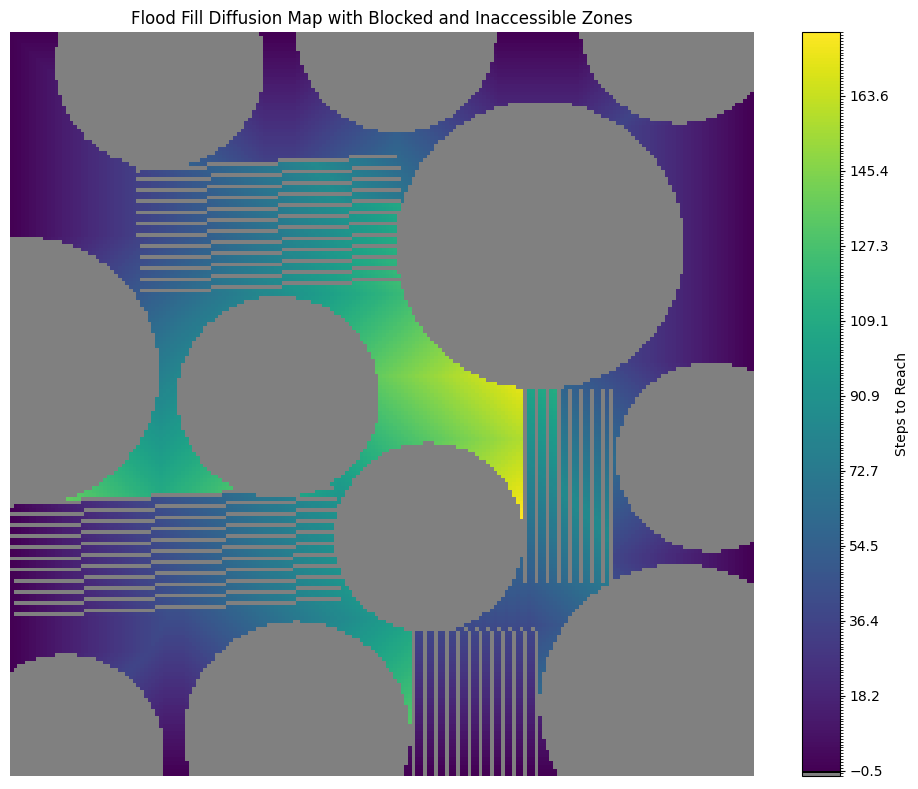

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
from matplotlib.colors import ListedColormap, BoundaryNorm

# Flood Fill 알고리즘
def flood_fill_time_map(final_obstacle_map, start_points):
    h, w = final_obstacle_map.shape
    time_map = np.full((h, w), np.inf)
    visited = np.zeros((h, w), dtype=bool)
    queue = deque()

    for y, x in start_points:
        if final_obstacle_map[y, x] == 0:
            queue.append((y, x, 0))
            time_map[y, x] = 0
            visited[y, x] = True

    while queue:
        y, x, t = queue.popleft()
        for dy, dx in [(-1,0), (1,0), (0,-1), (0,1)]:
            ny, nx = y + dy, x + dx
            if 0 <= ny < h and 0 <= nx < w:
                if not visited[ny, nx] and final_obstacle_map[ny, nx] == 0:
                    visited[ny, nx] = True
                    time_map[ny, nx] = t + 1
                    queue.append((ny, nx, t + 1))
    return time_map

# 가장자리에서 시작점 찾기
def get_edge_starts(final_obstacle_map):
    starts = []
    h, w = final_obstacle_map.shape
    for i in range(h):
        if final_obstacle_map[i, 0] == 0:
            starts.append((i, 0))
        if final_obstacle_map[i, w-1] == 0:
            starts.append((i, w-1))
    for j in range(w):
        if final_obstacle_map[0, j] == 0:
            starts.append((0, j))
        if final_obstacle_map[h-1, j] == 0:
            starts.append((h-1, j))
    return starts

# Flood Fill 실행
start_points = get_edge_starts(final_obstacle_map)
time_map = flood_fill_time_map(final_obstacle_map, start_points)

# 시각화용 맵 생성
visual_map = np.zeros_like(time_map)
visual_map[~np.isinf(time_map)] = time_map[~np.isinf(time_map)]                  # 도달 가능
visual_map[(np.isinf(time_map)) & (final_obstacle_map == 0)] = -1                      # 빈 공간이지만 도달 못함
visual_map[final_obstacle_map == 1] = -2                                               # 입자

# 색상 정의
cmap_colors = [
    'grey',          # -2: 입자
    'black',      # -1: 도달 못한 빈 공간
    *plt.cm.viridis(np.linspace(0, 1, 256))  # 나머지 퍼짐 경로
]
cmap = ListedColormap(cmap_colors)

# 범위 및 색상 정규화
max_time = np.nanmax(time_map[~np.isinf(time_map)])
bounds = [-2.5, -1.5, -0.5] + list(np.linspace(0, max_time, 257)[1:])
norm = BoundaryNorm(bounds, cmap.N)

# 시각화
plt.figure(figsize=(10, 8))
plt.imshow(visual_map, cmap=cmap, norm=norm, interpolation='nearest')
plt.title("Flood Fill Diffusion Map with Blocked and Inaccessible Zones")
plt.colorbar(label='Steps to Reach')
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# 전해질이 존재하는 영역 (입자가 없는 부분)
electrolyte_mask = (final_obstacle_map == 0)

# 그 중 도달 가능한 영역
reachable_mask = (~np.isinf(time_map)) & electrolyte_mask

# 도달 가능 비율 계산
total_electrolyte_voxels = np.sum(electrolyte_mask)
reachable_voxels = np.sum(reachable_mask)
reachable_ratio = reachable_voxels / total_electrolyte_voxels * 100

# 평균 도달 시간과 표준편차 (도달 가능한 전해질 영역만)
average_steps = np.mean(time_map[reachable_mask])
std_steps = np.std(time_map[reachable_mask])

# 결과 출력
print("🔍 정확한 통계 분석 결과 (전해질 영역 기준)")
print(f"1. 전해질 영역 도달 가능 비율: {reachable_ratio:.2f}%")
print(f"2. 평균 도달 시간: {average_steps:.2f} steps")
print(f"3. 도달 시간 표준편차: {std_steps:.2f} steps")


🔍 정확한 통계 분석 결과 (전해질 영역 기준)
1. 전해질 영역 도달 가능 비율: 100.00%
2. 평균 도달 시간: 50.44 steps
3. 도달 시간 표준편차: 42.26 steps


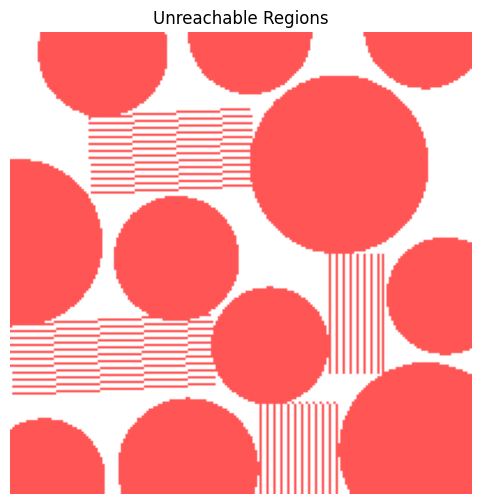

🔴 이온이 도달 불가능한 면적 비율: 0.00%


In [ ]:
# 3색 구분: 0 = 도달 가능 전해질, 1 = 입자, 2 = 도달 불가능 전해질
visual_map = np.zeros_like(final_obstacle_map, dtype=int)

# 입자 (장애물) 영역
visual_map[final_obstacle_map == 1] = 1

# 도달 불가능한 전해질 영역
unreachable_mask = (final_obstacle_map == 0) & np.isinf(time_map)
visual_map[unreachable_mask] = 2

# 색상 맵 정의
from matplotlib.colors import ListedColormap

# 흰색(도달가능), 검정(입자), 빨강(도달불가)
cmap = ListedColormap(["#FFFFFF", "#000000", "#FF5555"])

# 시각화
plt.figure(figsize=(8, 6))
plt.imshow(visual_map, cmap=cmap)
plt.title("Unreachable Regions")
plt.axis("off")
plt.show()

# 도달 불가능한 전해질 비율 계산
total_electrolyte = np.sum(final_obstacle_map == 0)
unreachable_electrolyte = np.sum(unreachable_mask)

if total_electrolyte > 0:
    unreachable_ratio = (unreachable_electrolyte / total_electrolyte) * 100
    print(f"🔴 이온이 도달 불가능한 면적 비율: {unreachable_ratio:.2f}%")
else:
    print("⚠️ 전해질이 존재하지 않습니다.")


--- 3D LFP 입자 초기 배치 (Optimized) ---
초기 배치 후 입자 수: 651, 기공률: 68.27%

--- 3D LFP 입자 성장 시도 (Optimized) ---
더 이상 입자 성장이 어려워 종료합니다.

--- 배치 완료 ---
최종 입자 수: 651
최종 점유 부피: 400481.63 μm³
최종 기공률: 59.95%

--- 3D 시각화 (Optimized) ---


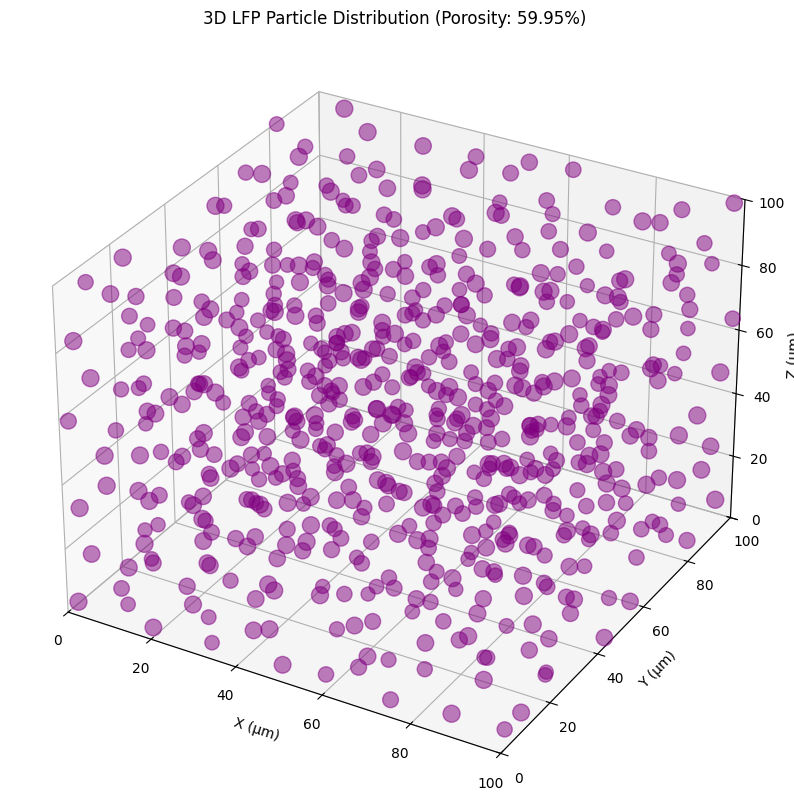

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi
from scipy.spatial import KDTree # KDTree를 임포트합니다.

# 랜덤 시드 고정
np.random.seed(42)

def sphere_volume(r):
    """반지름 r인 구의 부피 계산."""
    return (4/3) * pi * r**3

def place_lfp_3d_optimized(domain_size, min_r_LFP=5, max_r_LFP=10, target_porosity=0.3, max_attempts_particle=10000, max_attempts_growth=5000):
    """
    KDTree를 사용하여 최적화된 3D LFP 입자 배치 함수.
    """
    lfp_positions = [] # [(x, y, z, r), ...]
    total_volume = domain_size ** 3
    max_occupied_volume = total_volume * (1 - target_porosity)
    occupied_volume = 0

    print("--- 3D LFP 입자 초기 배치 (Optimized) ---")
    # 1단계: KDTree를 이용한 빠른 초기 배치
    for attempt in range(max_attempts_particle):
        if occupied_volume >= max_occupied_volume:
            print("목표 부피에 도달하여 초기 배치를 중단합니다.")
            break

        r_LFP = np.random.uniform(min_r_LFP, max_r_LFP)
        center = np.random.uniform(0, domain_size, 3)

        # KDTree를 생성하여 주변 입자를 빠르게 검색
        if lfp_positions:
            # 현재 입자들의 중심 좌표만으로 KDTree 구성
            points = np.array([p[:3] for p in lfp_positions])
            tree = KDTree(points)

            # 검색 반경: 새 입자 반지름 + 최대 입자 반지름 (충돌 가능한 최대 거리)
            search_radius = r_LFP + max_r_LFP
            # 내 주변의 이웃 입자 인덱스 찾기
            indices = tree.query_ball_point(center, r=search_radius)

            overlap = False
            for i in indices:
                lx, ly, lz, lr = lfp_positions[i]
                dist_sq = np.sum((center - np.array([lx, ly, lz]))**2)
                if dist_sq < (r_LFP + lr)**2:
                    overlap = True
                    break
        else: # 첫 입자는 검사 필요 없음
            overlap = False

        if not overlap:
            lfp_positions.append((*center, r_LFP))
            occupied_volume += sphere_volume(r_LFP)

    print(f"초기 배치 후 입자 수: {len(lfp_positions)}, 기공률: {1 - occupied_volume / total_volume:.2%}")

    print("\n--- 3D LFP 입자 성장 시도 (Optimized) ---")
    # 2단계: KDTree를 이용한 빠른 성장
    # 작은 입자부터 성장시키기 위해 반지름 순으로 정렬
    lfp_positions.sort(key=lambda item: item[3])

    for growth_iter in range(max_attempts_growth):
        if occupied_volume >= max_occupied_volume:
            print("목표 부피에 도달하여 성장을 중단합니다.")
            break

        something_grew = False
        # KDTree는 매 성장 단계마다 다시 만들어야 함 (입자 위치는 고정, 반지름만 변경)
        points = np.array([p[:3] for p in lfp_positions])
        if not points.any(): break
        tree = KDTree(points)

        for i in range(len(lfp_positions)):
            lx, ly, lz, lr = lfp_positions[i]

            if lr >= max_r_LFP:
                continue

            new_lr = min(lr * 1.01, max_r_LFP) # 1% 성장, 최대 반지름 제한

            # 검색 반경: 새 반지름 + 최대 반지름
            search_radius = new_lr + max_r_LFP
            center = np.array([lx, ly, lz])
            indices = tree.query_ball_point(center, r=search_radius)

            overlap = False
            for j in indices:
                if i == j: continue # 자기 자신은 제외
                plx, ply, plz, plr = lfp_positions[j]
                dist_sq = np.sum((center - np.array([plx, ply, plz]))**2)
                if dist_sq < (new_lr + plr)**2:
                    overlap = True
                    break

            if not overlap:
                occupied_volume -= sphere_volume(lr)
                occupied_volume += sphere_volume(new_lr)
                lfp_positions[i] = (lx, ly, lz, new_lr)
                something_grew = True

        if not something_grew:
            print("더 이상 입자 성장이 어려워 종료합니다.")
            break

    final_occupied_volume = sum(sphere_volume(r) for (*_, r) in lfp_positions)
    final_porosity = 1 - final_occupied_volume / total_volume
    print(f"\n--- 배치 완료 ---")
    print(f"최종 입자 수: {len(lfp_positions)}")
    print(f"최종 점유 부피: {final_occupied_volume:.2f} μm³")
    print(f"최종 기공률: {final_porosity:.2%}")

    return lfp_positions

# 예시 사용
domain_size = 100
target_porosity = 0.3
min_r = 4
max_r = 6

# 최적화된 함수 호출
lfp_positions_3d = place_lfp_3d_optimized(domain_size, min_r_LFP=min_r, max_r_LFP=max_r, target_porosity=target_porosity)

# 3D 시각화 (빠른 scatter 방식 사용)
print("\n--- 3D 시각화 (Optimized) ---")
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

if lfp_positions_3d:
    # 한 번에 모든 점을 그리는 것이 훨씬 빠름
    positions = np.array(lfp_positions_3d)
    # 점의 크기를 반지름에 비례하도록 설정 (적절한 상수를 곱해 조절)
    sizes = (positions[:, 3] / max_r) * 150

    ax.scatter(positions[:, 0], positions[:, 1], positions[:, 2], s=sizes, c='purple', alpha=0.5)

ax.set_xlim(0, domain_size)
ax.set_ylim(0, domain_size)
ax.set_zlim(0, domain_size)
ax.set_xlabel('X (μm)')
ax.set_ylabel('Y (μm)')
ax.set_zlabel('Z (μm)')
final_porosity_val = 1 - sum(sphere_volume(r) for r in positions[:, 3]) / (domain_size**3)
ax.set_title(f"3D LFP Particle Distribution (Porosity: {final_porosity_val:.2%})")
plt.show()

--- 3D LFP 입자 초기 배치 (Optimized) ---
초기 배치 후 입자 수: 229, 기공률: 59.77%

--- 3D LFP 입자 성장 시도 (Optimized) ---

--- 배치 완료 ---
최종 입자 수: 229
최종 점유 부피: 61075.28 μm³
최종 기공률: 51.14%

--- 3D Surface Visualization ---


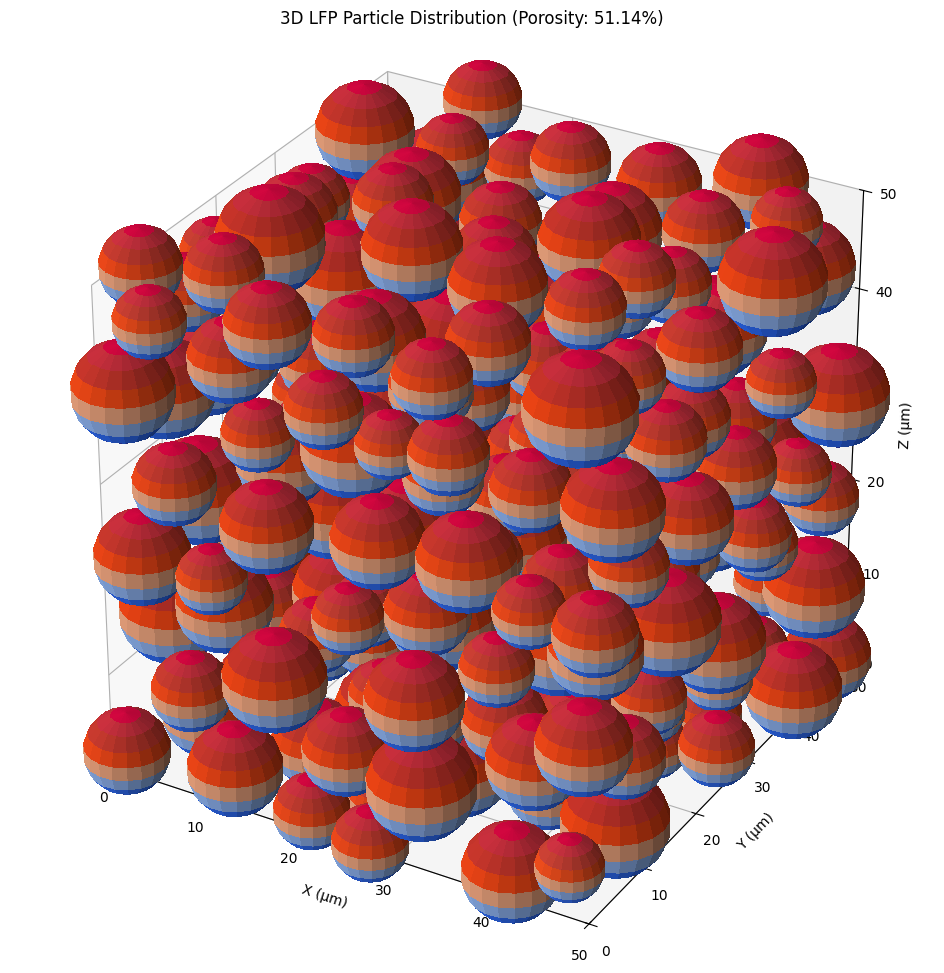

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi
from scipy.spatial import KDTree
from matplotlib.colors import LightSource #! 광원 효과를 위한 모듈

# (이전에 제공된 최적화된 place_lfp_3d_optimized 함수는 여기에 그대로 사용합니다)
def sphere_volume(r):
    return (4/3) * pi * r**3

def place_lfp_3d_optimized(domain_size, min_r_LFP=1.25, max_r_LFP=2.5, target_porosity=0.2, max_attempts_particle=10000, max_attempts_growth=5000):
    lfp_positions = []
    total_volume = domain_size ** 3
    max_occupied_volume = total_volume * (1 - target_porosity)
    occupied_volume = 0

    print("--- 3D LFP 입자 초기 배치 (Optimized) ---")
    for attempt in range(max_attempts_particle):
        if occupied_volume >= max_occupied_volume:
            break
        r_LFP = np.random.uniform(min_r_LFP, max_r_LFP)
        center = np.random.uniform(0, domain_size, 3)
        if lfp_positions:
            points = np.array([p[:3] for p in lfp_positions])
            tree = KDTree(points)
            search_radius = r_LFP + max_r_LFP
            indices = tree.query_ball_point(center, r=search_radius)
            overlap = False
            for i in indices:
                lx, ly, lz, lr = lfp_positions[i]
                dist_sq = np.sum((center - np.array([lx, ly, lz]))**2)
                if dist_sq < (r_LFP + lr)**2:
                    overlap = True
                    break
        else:
            overlap = False
        if not overlap:
            lfp_positions.append((*center, r_LFP))
            occupied_volume += sphere_volume(r_LFP)
    print(f"초기 배치 후 입자 수: {len(lfp_positions)}, 기공률: {1 - occupied_volume / total_volume:.2%}")
    print("\n--- 3D LFP 입자 성장 시도 (Optimized) ---")
    lfp_positions.sort(key=lambda item: item[3])
    for growth_iter in range(max_attempts_growth):
        if occupied_volume >= max_occupied_volume:
            break
        something_grew = False
        points = np.array([p[:3] for p in lfp_positions])
        if not points.any(): break
        tree = KDTree(points)
        for i in range(len(lfp_positions)):
            lx, ly, lz, lr = lfp_positions[i]
            if lr >= max_r_LFP:
                continue
            new_lr = min(lr * 1.01, max_r_LFP)
            search_radius = new_lr + max_r_LFP
            center = np.array([lx, ly, lz])
            indices = tree.query_ball_point(center, r=search_radius)
            overlap = False
            for j in indices:
                if i == j: continue
                plx, ply, plz, plr = lfp_positions[j]
                dist_sq = np.sum((center - np.array([plx, ply, plz]))**2)
                if dist_sq < (new_lr + plr)**2:
                    overlap = True
                    break
            if not overlap:
                occupied_volume -= sphere_volume(lr)
                occupied_volume += sphere_volume(new_lr)
                lfp_positions[i] = (lx, ly, lz, new_lr)
                something_grew = True
        if not something_grew:
            break
    final_occupied_volume = sum(sphere_volume(r) for (*_, r) in lfp_positions)
    final_porosity = 1 - final_occupied_volume / total_volume
    print(f"\n--- 배치 완료 ---")
    print(f"최종 입자 수: {len(lfp_positions)}")
    print(f"최종 점유 부피: {final_occupied_volume:.2f} μm³")
    print(f"최종 기공률: {final_porosity:.2%}")
    return lfp_positions

# --- 메인 실행 부분 ---

# 파라미터 설정
domain_size = 50
target_porosity = 0.4
min_r = 3
max_r = 5

# 입자 생성
lfp_positions_3d = place_lfp_3d_optimized(
    domain_size,
    min_r_LFP=min_r,
    max_r_LFP=max_r,
    target_porosity=target_porosity
)

# --- 💡 3D 입체감을 살린 시각화 ---
print("\n--- 3D Surface Visualization ---")

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# 1. 광원 객체 생성 (조명 효과)
#    azdeg: 빛의 방위각 (수평 방향), altdeg: 빛의 고도각 (수직 방향)
light = LightSource(azdeg=315, altdeg=45)

# 2. 구 표면을 그리기 위한 메쉬(mesh) 생성
#    u, v는 구의 위도, 경도를 나타내는 파라미터입니다.
#    값을 높이면 구가 더 부드러워지지만 렌더링이 느려집니다. (10~20 사이가 적당)
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 10)

# 3. 각 LFP 입자에 대해 반복하며 구 그리기
#    입자 수가 너무 많으면(예: 500개 이상) 매우 느려질 수 있습니다.
num_particles_to_draw = len(lfp_positions_3d)
if num_particles_to_draw > 500:
    print(f"입자 수가 {num_particles_to_draw}개로 너무 많아 시각화를 건너뜁니다.")
else:
    for x, y, z, r in lfp_positions_3d:
        # 구의 표면 좌표 계산
        sx = x + r * np.outer(np.cos(u), np.sin(v))
        sy = y + r * np.outer(np.sin(u), np.sin(v))
        sz = z + r * np.outer(np.ones(np.size(u)), np.cos(v))

        # 💡 입체감의 핵심: 광원을 적용하여 색상 계산
        #    기본 색상을 'purple'로 설정하고, 광원에 따라 명암이 적용된 RGB 색상 배열을 얻습니다.
        rgb = light.shade(sz, cmap=plt.cm.coolwarm)

        ax.plot_surface(sx, sy, sz, rstride=1, cstride=1, facecolors=rgb,
                        linewidth=0, antialiased=False, shade=True)

    # 축 및 타이틀 설정
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_zlim(0, domain_size)
    ax.set_xlabel('X (μm)')
    ax.set_ylabel('Y (μm)')
    ax.set_zlabel('Z (μm)')
    final_porosity_val = 1 - sum(sphere_volume(r) for (*_, r) in lfp_positions_3d) / (domain_size**3)
    ax.set_title(f"3D LFP Particle Distribution (Porosity: {final_porosity_val:.2%})")

    # 보기 좋게 축 비율을 동일하게 맞춤
    ax.set_aspect('equal')
    plt.show()


--- 3D Surface Visualization (Corrected) ---


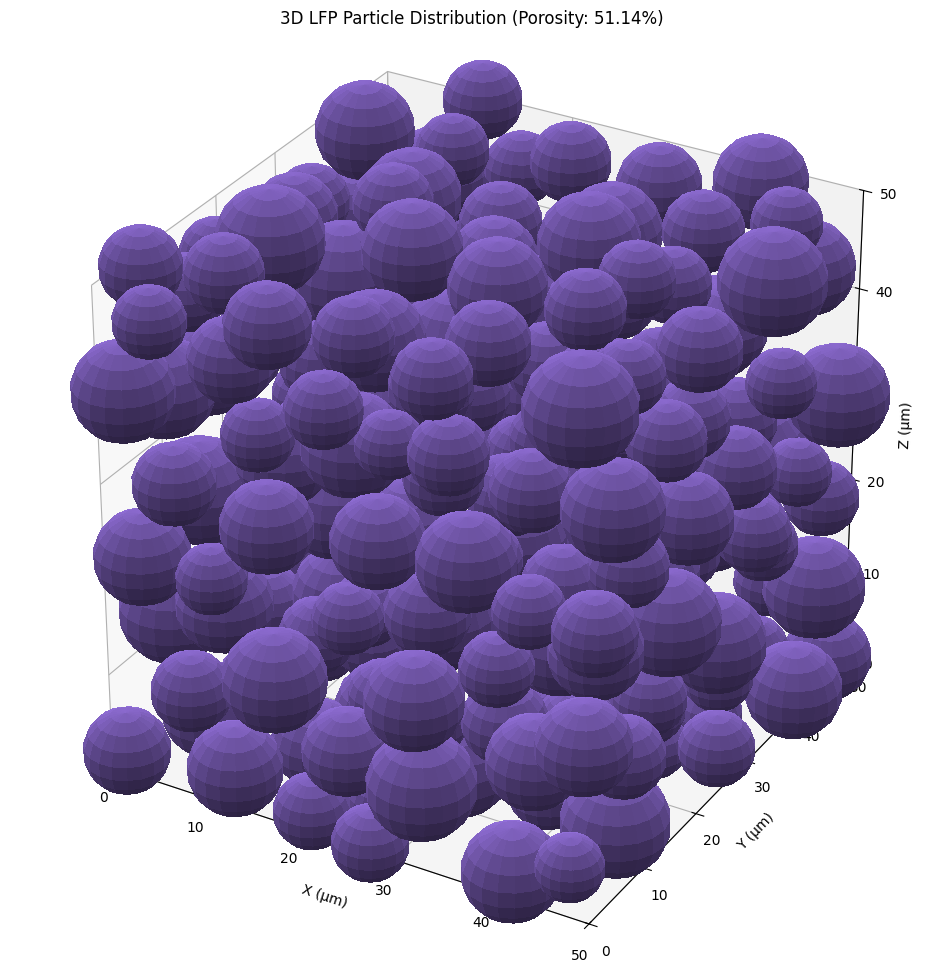

In [ ]:
# (이전의 입자 배치 코드는 동일합니다)
# ...
# lfp_positions_3d = place_lfp_3d_optimized(...)
# ...

# --- 💡 3D 입체감을 살린 시각화 (수정된 버전) ---
print("\n--- 3D Surface Visualization (Corrected) ---")

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# 1. 광원 객체 생성 (일관된 조명 효과를 위해)
light = LightSource(azdeg=315, altdeg=45)

# 2. 구 표면을 그리기 위한 메쉬(mesh) 생성
u = np.linspace(0, 2 * np.pi, 20)
v = np.linspace(0, np.pi, 10)

# 3. 각 LFP 입자에 대해 반복하며 구 그리기
num_particles_to_draw = len(lfp_positions_3d)
if num_particles_to_draw > 500:
    print(f"입자 수가 {num_particles_to_draw}개로 너무 많아 시각화를 건너뜁니다.")
else:
    # 모든 구에 적용할 단일 색상 정의
    sphere_color = 'mediumpurple' # 원하는 색상으로 변경 가능

    for x, y, z, r in lfp_positions_3d:
        # 구의 표면 좌표 계산
        sx = x + r * np.outer(np.cos(u), np.sin(v))
        sy = y + r * np.outer(np.sin(u), np.sin(v))
        sz = z + r * np.outer(np.ones(np.size(u)), np.cos(v))

        # --- 💡 수정된 부분 ---
        # facecolors 대신 color와 lightsource 옵션을 사용합니다.
        # 이렇게 하면 Z축 높이가 아닌, 광원에 따른 명암만 표현됩니다.
        ax.plot_surface(sx, sy, sz, rstride=1, cstride=1, color=sphere_color,
                        lightsource=light, # 정의된 광원 적용
                        linewidth=0, antialiased=False, shade=True)

# 축 및 타이틀 설정
ax.set_xlim(0, domain_size)
ax.set_ylim(0, domain_size)
ax.set_zlim(0, domain_size)
ax.set_xlabel('X (μm)')
ax.set_ylabel('Y (μm)')
ax.set_zlabel('Z (μm)')
final_porosity_val = 1 - sum(sphere_volume(r) for (*_, r) in lfp_positions_3d) / (domain_size**3)
ax.set_title(f"3D LFP Particle Distribution (Porosity: {final_porosity_val:.2%})")

# 보기 좋게 축 비율을 동일하게 맞춤
ax.set_aspect('equal')
plt.show()

--- 3D LFP 입자 초기 배치 (Optimized) ---
초기 배치 후 입자 수: 295, 기공률: 61.51%
총 시도 횟수 (초기 배치): 10000

--- 3D LFP 입자 성장 시도 (Optimized) ---
더 이상 입자 성장이 어려워 종료합니다.

--- 배치 완료 ---
최종 입자 수: 295
최종 점유 부피 (단순 계산): 495203.04 μm³
최종 기공률 (단순 계산): 50.48%
총 시도 횟수 (성장 단계): 60

--- 3D Surface Visualization (Clipped at Boundary) ---


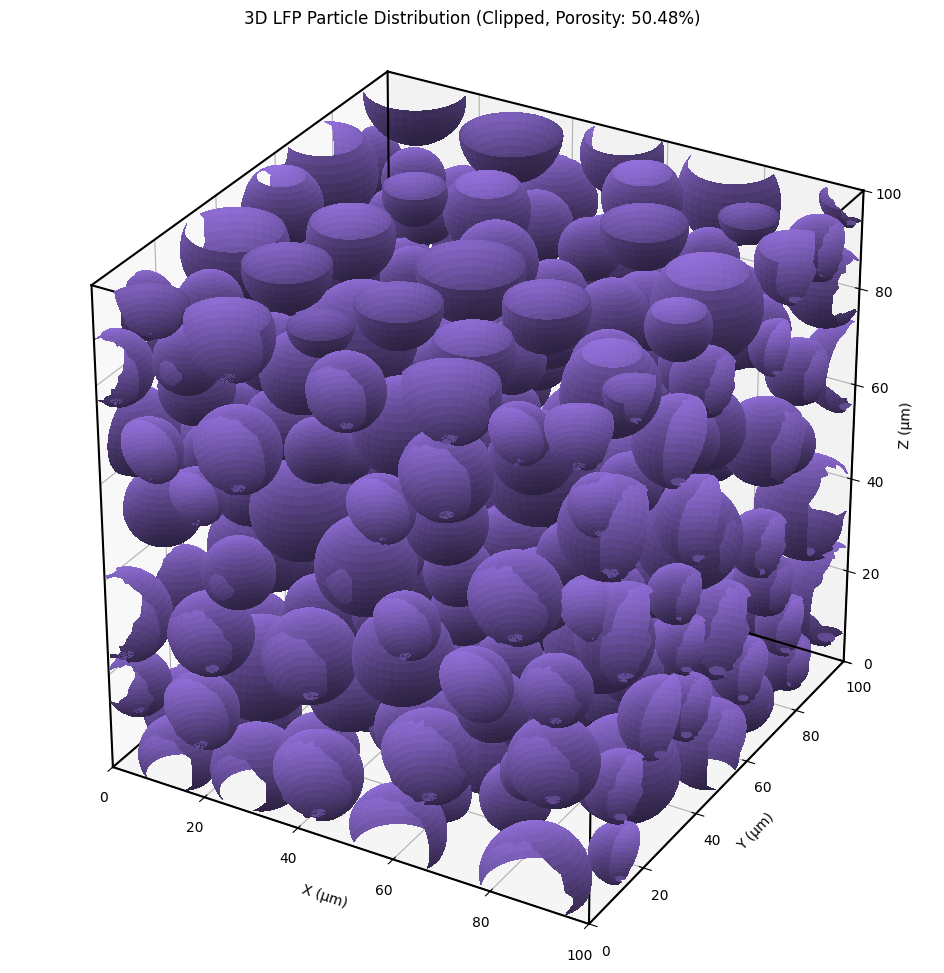

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import pi
from scipy.spatial import KDTree
from matplotlib.colors import LightSource

# 랜덤 시드 고정
np.random.seed(42)

def sphere_volume(r):
    """반지름 r인 구의 부피 계산."""
    return (4/3) * pi * r**3

def place_lfp_3d_optimized(domain_size, min_r_LFP=1.25, max_r_LFP=2.5, target_porosity=0.2, max_attempts_particle=10000, max_attempts_growth=5000):
    """
    KDTree를 사용하여 최적화된 3D LFP 입자 배치 함수 (오류 수정됨).
    """
    lfp_positions = []
    total_volume = domain_size ** 3
    max_occupied_volume = total_volume * (1 - target_porosity)
    occupied_volume = 0
    attempts = 0
    attempts_growth = 0


    print("--- 3D LFP 입자 초기 배치 (Optimized) ---")
    for attempt in range(max_attempts_particle):
        if occupied_volume >= max_occupied_volume:
            break
        r_LFP = np.random.uniform(min_r_LFP, max_r_LFP)
        center = np.random.uniform(0, domain_size, 3)
        if lfp_positions:
            points = np.array([p[:3] for p in lfp_positions])
            tree = KDTree(points)
            search_radius = r_LFP + max_r_LFP
            indices = tree.query_ball_point(center, r=search_radius)
            overlap = False
            for i in indices:
                lx, ly, lz, lr = lfp_positions[i]
                dist_sq = np.sum((center - np.array([lx, ly, lz]))**2)
                if dist_sq < (r_LFP + lr)**2:
                    overlap = True
                    break
        else:
            overlap = False
        if not overlap:
            lfp_positions.append((*center, r_LFP))
            occupied_volume += sphere_volume(r_LFP)
        attempts += 1


    print(f"초기 배치 후 입자 수: {len(lfp_positions)}, 기공률: {1 - sum(sphere_volume(r) for (*_, r) in lfp_positions) / total_volume:.2%}")
    print(f"총 시도 횟수 (초기 배치): {attempts}")


    print("\n--- 3D LFP 입자 성장 시도 (Optimized) ---")
    lfp_positions.sort(key=lambda item: item[3])

    for growth_iter in range(max_attempts_growth):
        if occupied_volume >= max_occupied_volume:
            break
        something_grew = False
        points = np.array([p[:3] for p in lfp_positions])
        if not points.any(): break
        tree = KDTree(points)
        for i in range(len(lfp_positions)):
            lx, ly, lz, lr = lfp_positions[i]
            if lr >= max_r_LFP:
                continue
            new_lr = min(lr * 1.01, max_r_LFP)
            search_radius = new_lr + max_r_LFP
            center = np.array([lx, ly, lz])
            indices = tree.query_ball_point(center, r=search_radius)
            overlap = False
            for j in indices:
                if i == j: continue
                plx, ply, plz, plr = lfp_positions[j]
                dist_sq = np.sum((center - np.array([plx, ply, plz]))**2)
                if dist_sq < (new_lr + plr)**2:
                    overlap = True
                    break
            if not overlap:
                occupied_volume -= sphere_volume(lr)
                occupied_volume += sphere_volume(new_lr)
                lfp_positions[i] = (lx, ly, lz, new_lr)
                something_grew = True
        attempts_growth += 1

        if not something_grew:
            print("더 이상 입자 성장이 어려워 종료합니다.")
            break

    final_occupied_volume = sum(sphere_volume(r) for (*_, r) in lfp_positions)
    final_porosity = 1 - final_occupied_volume / total_volume
    print(f"\n--- 배치 완료 ---")
    print(f"최종 입자 수: {len(lfp_positions)}")
    print(f"최종 점유 부피 (단순 계산): {final_occupied_volume:.2f} μm³")
    print(f"최종 기공률 (단순 계산): {final_porosity:.2%}")
    print(f"총 시도 횟수 (성장 단계): {attempts_growth}")


    return lfp_positions

# --- 메인 실행 부분 ---
domain_size = 100
target_porosity = 0.3
min_r = 5
max_r = 10

lfp_positions_3d = place_lfp_3d_optimized(
    domain_size,
    min_r_LFP=min_r,
    max_r_LFP=max_r,
    target_porosity=target_porosity
)

# --- 3D 입체감을 살린 시각화 (경계에서 자르기 추가) ---
print("\n--- 3D Surface Visualization (Clipped at Boundary) ---")

num_particles_to_draw = len(lfp_positions_3d)

if num_particles_to_draw <= 500: # 500개 이하일 때만 시각화
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')

    light = LightSource(azdeg=315, altdeg=45)
    # 구 표면의 해상도 증가 (잘린 면을 더 부드럽게 보이기 위해)
    u = np.linspace(0, 2 * np.pi, 40)
    v = np.linspace(0, np.pi, 20)
    sphere_color = 'mediumpurple'

    # 먼저 LFP 입자를 모두 그립니다.
    for x, y, z, r in lfp_positions_3d:
        # 구의 표면 좌표 계산
        sx = x + r * np.outer(np.cos(u), np.sin(v))
        sy = y + r * np.outer(np.sin(u), np.sin(v))
        sz = z + r * np.outer(np.ones(np.size(u)), np.cos(v))

        # 📌 경계에서 자르기: 도메인 범위 밖의 좌표는 NaN으로 설정
        mask = (sx >= 0) & (sx <= domain_size) & \
               (sy >= 0) & (sy <= domain_size) & \
               (sz >= 0) & (sz <= domain_size)

        sx[~mask] = np.nan
        sy[~mask] = np.nan
        sz[~mask] = np.nan

        # 수정된 좌표로 구 표면 그리기
        ax.plot_surface(sx, sy, sz, rstride=1, cstride=1, color=sphere_color,
                        lightsource=light, linewidth=0, antialiased=False, shade=True)

    # 📌 그 다음 도메인 경계선(12개 모서리)을 그립니다.
    # 이렇게 하면 선이 입자 위에 그려지게 됩니다.
    # 도메인 꼭짓점 좌표
    p000 = [0, 0, 0]
    p100 = [domain_size, 0, 0]
    p010 = [0, domain_size, 0]
    p001 = [0, 0, domain_size]
    p110 = [domain_size, domain_size, 0]
    p101 = [domain_size, 0, domain_size]
    p011 = [0, domain_size, domain_size]
    p111 = [domain_size, domain_size, domain_size]

    # 모서리 선 그리기
    edges = [
        (p000, p100), (p000, p010), (p000, p001),
        (p100, p110), (p100, p101),
        (p010, p110), (p010, p011),
        (p001, p101), (p001, p011),
        (p110, p111),
        (p101, p111),
        (p011, p111)
    ]

    edge_color = 'black'
    edge_linewidth = 1.5

    for start_point, end_point in edges:
        # zorder를 높게 설정하여 다른 요소들 위에 그려지도록 시도할 수 있지만,
        # 3D plot_surface와 plot 간에는 zorder 효과가 제한적일 수 있습니다.
        # 그리는 순서가 더 중요합니다.
        ax.plot([start_point[0], end_point[0]],
                [start_point[1], end_point[1]],
                [start_point[2], end_point[2]],
                color=edge_color, linewidth=edge_linewidth, zorder=100) # zorder 추가 시도


    # 축 및 타이틀 설정
    ax.set_xlim(0, domain_size)
    ax.set_ylim(0, domain_size)
    ax.set_zlim(0, domain_size)
    ax.set_xlabel('X (μm)')
    ax.set_ylabel('Y (μm)')
    ax.set_zlabel('Z (μm)')
    final_porosity_val = 1 - sum(sphere_volume(r) for (*_, r) in lfp_positions_3d) / (domain_size**3)
    ax.set_title(f"3D LFP Particle Distribution (Clipped, Porosity: {final_porosity_val:.2%})")
    ax.set_aspect('equal')
    plt.show()
else:
    print(f"입자 수가 너무 많아 (현재 {len(lfp_positions_3d)}개) 3D 시각화를 건너뜁니다.")

# Task
3D Voxel 격자에 LFP 입자를 배치하고, LFP 90: CB 6: 바인더 4의 질량 비율을 고려하여 CB와 바인더를 하나의 복합체(CBM)로 모델링하여 배치합니다. 이후 수정된 Flood Fill 알고리즘을 사용하여 이온이 이동 가능한 전해질 영역에서의 이동 거리를 계산하고, 도달 가능한 전해질 Voxel의 비율, 평균 이동 거리, 표준 편차를 분석합니다. 마지막으로 Obstacle Map, CBM 영역, Flood Fill 결과를 3D로 시각화합니다.

## Voxel mesh 기반 3d 입자 배치 및 obstacle map 생성

### Subtask:
미리 정의된 3D Voxel 격자 상에 LFP 입자를 배치하고 Obstacle Map을 생성합니다. 이때 LFP 입자가 차지하는 Voxel은 장애물(1)로 표시하고, 나머지는 빈 공간(0)으로 표시합니다.


**Reasoning**:
The subtask requires generating a 3D obstacle map based on the placed LFP particles. The previous code already defines the `place_lfp_3d_optimized` function and places the particles. The next step is to create the 3D voxel grid and mark the voxels occupied by the LFP particles as obstacles (1). The remaining voxels will be marked as free space (0). This involves iterating through each voxel and checking if its center is within any LFP sphere.



In [ ]:
# 2. 3D Voxel 격자 형태의 Obstacle Map 생성
# Voxel 크기 설정 (예: domain_size의 1/100)
voxel_size = 1.0  # 각 Voxel의 물리적 크기 (μm)
grid_resolution_3d = int(domain_size / voxel_size) # 각 차원별 Voxel 개수

obstacle_map_3d = np.zeros((grid_resolution_3d, grid_resolution_3d, grid_resolution_3d), dtype=np.uint8)

# Voxel 중심 좌표 계산을 위한 dx, dy, dz
dv = voxel_size

print(f"\n--- 3D Obstacle Map 생성 ---")
print(f"도메인 크기: {domain_size} μm")
print(f"Voxel 크기: {voxel_size} μm")
print(f"격자 해상도: {grid_resolution_3d} x {grid_resolution_3d} x {grid_resolution_3d}")

# 3. 각 Voxel의 중심 좌표가 LFP 입자 내부에 포함되는지 확인
num_lfp_particles = len(lfp_positions_3d)
print(f"처리할 LFP 입자 수: {num_lfp_particles}")

# LFP 입자 정보를 NumPy 배열로 변환 (더 빠른 접근을 위해)
if num_lfp_particles > 0:
    lfp_data = np.array(lfp_positions_3d)
    lfp_centers = lfp_data[:, :3]
    lfp_radii = lfp_data[:, 3]

    # 각 Voxel 중심 좌표에 대한 반복 (이중 루프보다 벡터화나 다른 최적화 고려 가능하지만, 기본 구현)
    # 더 빠른 방법: 각 LFP 입자에 대해 해당 입자가 포함할 수 있는 Voxel 범위를 계산하여 업데이트
    print("Voxel 맵 업데이트 중...")
    for idx, (cx, cy, cz, cr) in enumerate(lfp_positions_3d):
        # 입자 경계선에 살짝 여유를 줘서 계산 오류 방지
        buffer = 0.01 * cr
        min_x = max(0, int((cx - cr - buffer) / dv))
        max_x = min(grid_resolution_3d - 1, int((cx + cr + buffer) / dv))
        min_y = max(0, int((cy - cr - buffer) / dv))
        max_y = min(grid_resolution_3d - 1, int((cy + cr + buffer) / dv))
        min_z = max(0, int((cz - cr - buffer) / dv))
        max_z = min(grid_resolution_3d - 1, int((cz + cr + buffer) / dv))

        for i in range(min_x, max_x + 1):
            for j in range(min_y, max_y + 1):
                for k in range(min_z, max_z + 1):
                    # Voxel 중심 좌표 (μm 단위)
                    voxel_center_x = (i + 0.5) * dv
                    voxel_center_y = (j + 0.5) * dv
                    voxel_center_z = (k + 0.5) * dv

                    # Voxel 중심이 LFP 입자 내부에 포함되는지 확인
                    dist_sq = (voxel_center_x - cx)**2 + (voxel_center_y - cy)**2 + (voxel_center_z - cz)**2
                    if dist_sq <= cr**2:
                        obstacle_map_3d[i, j, k] = 1

    print("Voxel 맵 업데이트 완료.")
else:
    print("LFP 입자가 없어 Obstacle Map이 모두 0으로 초기화됩니다.")


# 4. 생성된 3D Obstacle Map을 obstacle_map_3d 변수에 저장 (이미 저장됨)

# 통계 확인
total_voxels = grid_resolution_3d ** 3
obstacle_voxels = np.sum(obstacle_map_3d)
free_voxels = total_voxels - obstacle_voxels
obstacle_ratio = obstacle_voxels / total_voxels * 100
free_ratio = free_voxels / total_voxels * 100

print(f"\n--- Obstacle Map 통계 ---")
print(f"총 Voxel 수: {total_voxels}")
print(f"장애물 Voxel 수 (LFP): {obstacle_voxels}")
print(f"빈 공간 Voxel 수: {free_voxels}")
print(f"장애물 비율: {obstacle_ratio:.2f}%")
print(f"빈 공간(기공) 비율: {free_ratio:.2f}%")



--- 3D Obstacle Map 생성 ---
도메인 크기: 100 μm
Voxel 크기: 1.0 μm
격자 해상도: 100 x 100 x 100
처리할 LFP 입자 수: 295
Voxel 맵 업데이트 중...
Voxel 맵 업데이트 완료.

--- Obstacle Map 통계 ---
총 Voxel 수: 1000000
장애물 Voxel 수 (LFP): 412994
빈 공간 Voxel 수: 587006
장애물 비율: 41.30%
빈 공간(기공) 비율: 58.70%


## 질량 비율을 부피 비율로 변환 및 cbm(cb+binder) 영역 정의

### Subtask:
입력된 LFP 90: CB 6: 바인더 4의 질량 비율과 각 물질의 밀도를 사용하여 부피 비율을 계산합니다. 계산된 부피 비율과 LFP가 차지하는 Voxel 수를 바탕으로 CBM이 차지할 Voxel 수를 결정하고, LFP가 배치되지 않은 빈 공간 중 해당 비율만큼을 CBM 복합체 영역으로 표시합니다. 나머지 빈 공간은 전해질 영역이 됩니다.


**Reasoning**:
Calculate the volume fractions of LFP, CB, and Binder based on their mass ratios and densities, determine the target number of CBM voxels, identify non-LFP voxels, randomly select CBM voxels, create the component map, and mark the different components. Finally, verify the voxel counts and percentages.



In [ ]:
# 1. Define densities (g/cm³) - typical values
density_lfp = 3.6  # g/cm³
density_cb = 1.8   # g/cm³
density_binder = 1.78 # g/cm³ (e.g., PVDF)

# 2. Define mass ratios
mass_ratio_lfp = 90
mass_ratio_cb = 6
mass_ratio_binder = 4
total_mass_ratio = mass_ratio_lfp + mass_ratio_cb + mass_ratio_binder

# 3. Assume a total mass (e.g., 100g) and calculate individual masses
# For simplicity, use the mass ratios directly as masses
mass_lfp = mass_ratio_lfp
mass_cb = mass_ratio_cb
mass_binder = mass_ratio_binder

# 4. Calculate the volume of each component (Volume = Mass / Density)
volume_lfp_unit = mass_lfp / density_lfp
volume_cb_unit = mass_cb / density_cb
volume_binder_unit = mass_binder / density_binder

# Volume of CBM (CB + Binder)
volume_cbm_unit = volume_cb_unit + volume_binder_unit

# Total solid volume (LFP + CBM)
total_solid_volume_unit = volume_lfp_unit + volume_cbm_unit

print(f"\n--- Volume Calculation (Relative Units) ---")
print(f"LFP Volume: {volume_lfp_unit:.4f}")
print(f"CB Volume: {volume_cb_unit:.4f}")
print(f"Binder Volume: {volume_binder_unit:.4f}")
print(f"CBM Volume: {volume_cbm_unit:.4f}")
print(f"Total Solid Volume: {total_solid_volume_unit:.4f}")


# 5. Calculate the volume fraction of each component relative to the total solid volume
volume_fraction_lfp_solid = volume_lfp_unit / total_solid_volume_unit
volume_fraction_cbm_solid = volume_cbm_unit / total_solid_volume_unit
volume_fraction_cb_solid = volume_cb_unit / total_solid_volume_unit # For verification
volume_fraction_binder_solid = volume_binder_unit / total_solid_volume_unit # For verification

print(f"\n--- Volume Fractions (Relative to Total Solid) ---")
print(f"LFP Volume Fraction: {volume_fraction_lfp_solid:.4f} ({volume_fraction_lfp_solid*100:.2f}%)")
print(f"CBM Volume Fraction: {volume_fraction_cbm_solid:.4f} ({volume_fraction_cbm_solid*100:.2f}%)")
# print(f"CB Volume Fraction (solid): {volume_fraction_cb_solid:.4f}") # Optional detail
# print(f"Binder Volume Fraction (solid): {volume_fraction_binder_solid:.4f}") # Optional detail


# 6. Determine the number of Voxels occupied by LFP from the obstacle_map_3d
lfp_voxels_count = np.sum(obstacle_map_3d == 1)
print(f"\n--- Voxel Allocation ---")
print(f"LFP Voxels (from obstacle_map_3d): {lfp_voxels_count}")

# 7. Calculate the total number of Voxels in the domain
total_voxels_count = grid_resolution_3d ** 3
print(f"Total Voxels in Domain: {total_voxels_count}")

# 8. Calculate the total volume of the domain in μm³
total_domain_volume_mu3 = domain_size ** 3
print(f"Total Domain Volume: {total_domain_volume_mu3:.2f} μm³")

# 9. Calculate the physical volume represented by one Voxel
voxel_volume_mu3 = voxel_size ** 3
print(f"Volume per Voxel: {voxel_volume_mu3:.2f} μm³")

# 10. Calculate the total physical volume occupied by LFP particles using the number of LFP Voxels
lfp_volume_mu3 = lfp_voxels_count * voxel_volume_mu3
print(f"Physical Volume of LFP Voxels: {lfp_volume_mu3:.2f} μm³")


# 11. Using the calculated volume fractions, determine the target physical volume for the CBM
# CBM Volume = LFP Volume * (CBM Volume Fraction / LFP Volume Fraction)
if volume_fraction_lfp_solid > 0:
    target_cbm_volume_mu3 = lfp_volume_mu3 * (volume_fraction_cbm_solid / volume_fraction_lfp_solid)
else:
    target_cbm_volume_mu3 = 0 # Should not happen if LFP is placed

print(f"Target Physical Volume for CBM: {target_cbm_volume_mu3:.2f} μm³")


# 12. Calculate the target number of Voxels that should be occupied by the CBM
if voxel_volume_mu3 > 0:
    target_cbm_voxels_count = int(round(target_cbm_volume_mu3 / voxel_volume_mu3))
else:
    target_cbm_voxels_count = 0 # Should not happen

print(f"Target CBM Voxels: {target_cbm_voxels_count}")


# 13. Identify the Voxels in obstacle_map_3d that are not occupied by LFP (where the value is 0)
non_lfp_voxel_indices = np.argwhere(obstacle_map_3d == 0)
num_non_lfp_voxels = len(non_lfp_voxel_indices)
print(f"Available non-LFP Voxels: {num_non_lfp_voxels}")

# Ensure target CBM voxels do not exceed available non-LFP voxels
if target_cbm_voxels_count > num_non_lfp_voxels:
    print(f"Warning: Target CBM voxels ({target_cbm_voxels_count}) exceeds available non-LFP voxels ({num_non_lfp_voxels}). Adjusting target.")
    target_cbm_voxels_count = num_non_lfp_voxels


# 14. Randomly select the target number of CBM Voxels from the available non-LFP Voxels
# Use a fixed seed for reproducibility if needed, but the overall LFP placement is already seeded
# np.random.seed(42) # Optional: uncomment for CBM placement reproducibility
if num_non_lfp_voxels > 0 and target_cbm_voxels_count > 0:
    selected_cbm_indices_flat = np.random.choice(
        num_non_lfp_voxels,
        size=target_cbm_voxels_count,
        replace=False # Ensure unique voxel selection
    )
    selected_cbm_indices = non_lfp_voxel_indices[selected_cbm_indices_flat]
    print(f"Randomly selected {len(selected_cbm_indices)} Voxels for CBM.")
else:
    selected_cbm_indices = np.array([])
    print("No non-LFP voxels or target CBM count is zero. No CBM placed.")


# 15. Create a new 3D NumPy array, component_map_3d, initialized with Electrolyte (0)
# Use dtype=np.uint8 for memory efficiency and consistency
component_map_3d = np.zeros((grid_resolution_3d, grid_resolution_3d, grid_resolution_3d), dtype=np.uint8)
# Electrolyte = 0 (already initialized)

# 16. Mark the Voxels selected for CBM with a value representing CBM (e.g., 2)
if selected_cbm_indices.shape[0] > 0:
    component_map_3d[selected_cbm_indices[:, 0], selected_cbm_indices[:, 1], selected_cbm_indices[:, 2]] = 2 # CBM = 2
    print("Marked selected Voxels as CBM.")

# 17. Mark the Voxels occupied by LFP in component_map_3d with a value representing LFP (e.g., 1)
# Use the obstacle_map_3d to identify LFP locations
lfp_voxel_indices = np.argwhere(obstacle_map_3d == 1)
if lfp_voxel_indices.shape[0] > 0:
    component_map_3d[lfp_voxel_indices[:, 0], lfp_voxel_indices[:, 1], lfp_voxel_indices[:, 2]] = 1 # LFP = 1
    print("Marked LFP Voxels.")


# 18. Verify the counts of Voxels assigned to LFP, CBM, and Electrolyte
lfp_final_count = np.sum(component_map_3d == 1)
cbm_final_count = np.sum(component_map_3d == 2)
electrolyte_final_count = np.sum(component_map_3d == 0)
total_final_count = lfp_final_count + cbm_final_count + electrolyte_final_count

print(f"\n--- Final Component Voxel Counts ---")
print(f"LFP Voxels: {lfp_final_count}")
print(f"CBM Voxels: {cbm_final_count}")
print(f"Electrolyte Voxels: {electrolyte_final_count}")
print(f"Total Voxels (Verification): {total_final_count} (Matches total_voxels_count: {total_voxels_count})")

# Calculate and print volume percentages
lfp_volume_percent = (lfp_final_count / total_voxels_count) * 100
cbm_volume_percent = (cbm_final_count / total_voxels_count) * 100
electrolyte_volume_percent = (electrolyte_final_count / total_voxels_count) * 100

print(f"\n--- Final Component Volume Percentages (Relative to Total Domain) ---")
print(f"LFP Volume %: {lfp_volume_percent:.2f}%")
print(f"CBM Volume %: {cbm_volume_percent:.2f}%")
print(f"Electrolyte Volume %: {electrolyte_volume_percent:.2f}%")
print(f"Total Volume % (Verification): {lfp_volume_percent + cbm_volume_percent + electrolyte_volume_percent:.2f}%")

# Verification of solid volume fractions
total_solid_voxels_final = lfp_final_count + cbm_final_count
if total_solid_voxels_final > 0:
    lfp_fraction_solid_final = lfp_final_count / total_solid_voxels_final
    cbm_fraction_solid_final = cbm_final_count / total_solid_voxels_final
    print(f"\n--- Final Solid Volume Fractions (Relative to Total Solid Voxels) ---")
    print(f"LFP Fraction (Solid): {lfp_fraction_solid_final:.4f} (Target: {volume_fraction_lfp_solid:.4f})")
    print(f"CBM Fraction (Solid): {cbm_fraction_solid_final:.4f} (Target: {volume_fraction_cbm_solid:.4f})")
else:
     print("\n--- Final Solid Volume Fractions ---")
     print("No solid voxels found.")




--- Volume Calculation (Relative Units) ---
LFP Volume: 25.0000
CB Volume: 3.3333
Binder Volume: 2.2472
CBM Volume: 5.5805
Total Solid Volume: 30.5805

--- Volume Fractions (Relative to Total Solid) ---
LFP Volume Fraction: 0.8175 (81.75%)
CBM Volume Fraction: 0.1825 (18.25%)

--- Voxel Allocation ---
LFP Voxels (from obstacle_map_3d): 412994
Total Voxels in Domain: 1000000
Total Domain Volume: 1000000.00 μm³
Volume per Voxel: 1.00 μm³
Physical Volume of LFP Voxels: 412994.00 μm³
Target Physical Volume for CBM: 92188.92 μm³
Target CBM Voxels: 92189
Available non-LFP Voxels: 587006
Randomly selected 92189 Voxels for CBM.
Marked selected Voxels as CBM.
Marked LFP Voxels.

--- Final Component Voxel Counts ---
LFP Voxels: 412994
CBM Voxels: 92189
Electrolyte Voxels: 494817
Total Voxels (Verification): 1000000 (Matches total_voxels_count: 1000000)

--- Final Component Volume Percentages (Relative to Total Domain) ---
LFP Volume %: 41.30%
CBM Volume %: 9.22%
Electrolyte Volume %: 49.48%
Tot

## Flood fill 알고리즘 수정 및 적용

### Subtask:
CBM 복합체 영역을 고려하여 Flood Fill 알고리즘을 수정합니다. 이온은 전해질 영역(LFP 입자가 아닌 빈 공간 중 CBM이 아닌 영역)만 이동할 수 있도록 합니다. Edge에서 시작하여 도달 가능한 전해질 Voxel까지의 거리를 계산하는 Time Map을 생성합니다.


**Reasoning**:
Define the 3D Flood Fill function that considers only electrolyte voxels (value 0) and implement the logic to find starting points on the edges of the domain that are electrolyte voxels. Then, call the flood fill function with the component map and the starting points.



In [ ]:
import numpy as np
from collections import deque

def flood_fill_3d(component_map_3d, start_points):
    """
    Performs a 3D flood fill on the component_map_3d, calculating the minimum
    steps to reach each electrolyte voxel (value 0) from the start_points.

    Args:
        component_map_3d: A 3D NumPy array representing the domain components.
                          0: Electrolyte (reachable)
                          1: LFP (obstacle)
                          2: CBM (obstacle)
        start_points: A list of (z, y, x) tuples representing the starting
                      voxel coordinates for the flood fill.

    Returns:
        A 3D NumPy array (time_map) of the same shape as component_map_3d,
        where each element is the minimum number of steps to reach that voxel
        from any start_point. np.inf indicates unreachable voxels.
    """
    D, H, W = component_map_3d.shape
    time_map = np.full((D, H, W), np.inf)
    visited = np.zeros((D, H, W), dtype=bool)
    queue = deque()

    # Initialize the queue with valid electrolyte start points
    for z, y, x in start_points:
        # Check if the start point is within bounds and is an electrolyte voxel
        if 0 <= z < D and 0 <= y < H and 0 <= x < W and component_map_3d[z, y, x] == 0:
            queue.append((z, y, x, 0))
            time_map[z, y, x] = 0
            visited[z, y, x] = True

    # Define the 6-directional movements (z, y, x)
    directions = [
        (-1, 0, 0), (1, 0, 0),  # Z direction
        (0, -1, 0), (0, 1, 0),  # Y direction
        (0, 0, -1), (0, 0, 1)   # X direction
    ]

    # Perform BFS
    while queue:
        z, y, x, t = queue.popleft()

        for dz, dy, dx in directions:
            nz, ny, nx = z + dz, y + dy, x + dx

            # Check boundaries
            if 0 <= nz < D and 0 <= ny < H and 0 <= nx < W:
                # Check if not visited and is an electrolyte voxel
                if not visited[nz, ny, nx] and component_map_3d[nz, ny, nx] == 0:
                    visited[nz, ny, nx] = True
                    time_map[nz, ny, nx] = t + 1
                    queue.append((nz, ny, nx, t + 1))

    return time_map

# Find electrolyte voxels on the domain edges to use as start points
def get_electrolyte_edge_starts_3d(component_map_3d):
    """
    Finds the coordinates of electrolyte voxels (value 0) located on the
    edges of the 3D domain.

    Args:
        component_map_3d: A 3D NumPy array representing the domain components.

    Returns:
        A list of (z, y, x) tuples for electrolyte voxels on the edges.
    """
    D, H, W = component_map_3d.shape
    start_points = []

    # Iterate through all edge voxels
    for z in range(D):
        for y in range(H):
            for x in range(W):
                # Check if voxel is on an edge (x=0 or W-1, y=0 or H-1, z=0 or D-1)
                is_on_edge = (x == 0 or x == W - 1) or \
                             (y == 0 or y == H - 1) or \
                             (z == 0 or z == D - 1)

                # Check if it's an electrolyte voxel and is on an edge
                if component_map_3d[z, y, x] == 0 and is_on_edge:
                    start_points.append((z, y, x))

    return start_points

# Find start points on the edges
electrolyte_start_points_3d = get_electrolyte_edge_starts_3d(component_map_3d)
print(f"\nFound {len(electrolyte_start_points_3d)} electrolyte voxels on the edges.")

# Run the 3D Flood Fill algorithm
print("Running 3D Flood Fill algorithm...")
time_map_3d = flood_fill_3d(component_map_3d, electrolyte_start_points_3d)
print("3D Flood Fill completed.")

# You can inspect a slice of the time_map_3d to see the results
# For example, print a slice at z=D//2
# print("\nSlice of time_map_3d at z=domain_size/2:")
# print(time_map_3d[grid_resolution_3d // 2, :, :])


Found 29494 electrolyte voxels on the edges.
Running 3D Flood Fill algorithm...
3D Flood Fill completed.


**Reasoning**:
Calculate the reachable electrolyte voxel ratio, the average distance, and the standard deviation from the generated 3D time map, considering only the electrolyte voxels (value 0 in `component_map_3d`).



In [ ]:
# Calculate the total number of electrolyte voxels
total_electrolyte_voxels_3d = np.sum(component_map_3d == 0)

# Identify reachable electrolyte voxels (where time_map_3d is not infinity and component_map_3d is 0)
reachable_electrolyte_mask_3d = (~np.isinf(time_map_3d)) & (component_map_3d == 0)
reachable_electrolyte_voxels_count_3d = np.sum(reachable_electrolyte_mask_3d)

# Calculate the ratio of reachable electrolyte voxels
if total_electrolyte_voxels_3d > 0:
    reachable_electrolyte_ratio_3d = (reachable_electrolyte_voxels_count_3d / total_electrolyte_voxels_3d) * 100
else:
    reachable_electrolyte_ratio_3d = 0.0

# Calculate the average distance and standard deviation for reachable electrolyte voxels
# Use only the finite values from the time_map_3d within the reachable mask
reachable_times_3d = time_map_3d[reachable_electrolyte_mask_3d]

if len(reachable_times_3d) > 0:
    average_distance_3d = np.mean(reachable_times_3d)
    std_deviation_3d = np.std(reachable_times_3d)
else:
    average_distance_3d = 0.0
    std_deviation_3d = 0.0

# Print the results
print("\n--- 3D Electrolyte Reachability Analysis ---")
print(f"Total Electrolyte Voxels: {total_electrolyte_voxels_3d}")
print(f"Reachable Electrolyte Voxels: {reachable_electrolyte_voxels_count_3d}")
print(f"Reachable Electrolyte Ratio: {reachable_electrolyte_ratio_3d:.2f}%")
print(f"Average Distance (steps) for Reachable Electrolyte: {average_distance_3d:.2f}")
print(f"Standard Deviation of Distance: {std_deviation_3d:.2f}")



--- 3D Electrolyte Reachability Analysis ---
Total Electrolyte Voxels: 494817
Reachable Electrolyte Voxels: 494450
Reachable Electrolyte Ratio: 99.93%
Average Distance (steps) for Reachable Electrolyte: 14.78
Standard Deviation of Distance: 11.52


## 3d 시각화

### Subtask:
Voxel Mesh 기반의 3D Obstacle Map, CBM 영역, 그리고 Flood Fill 결과를 3D로 시각화하여 보여줍니다.


**Reasoning**:
Visualize the 3D component map and the flood fill results.



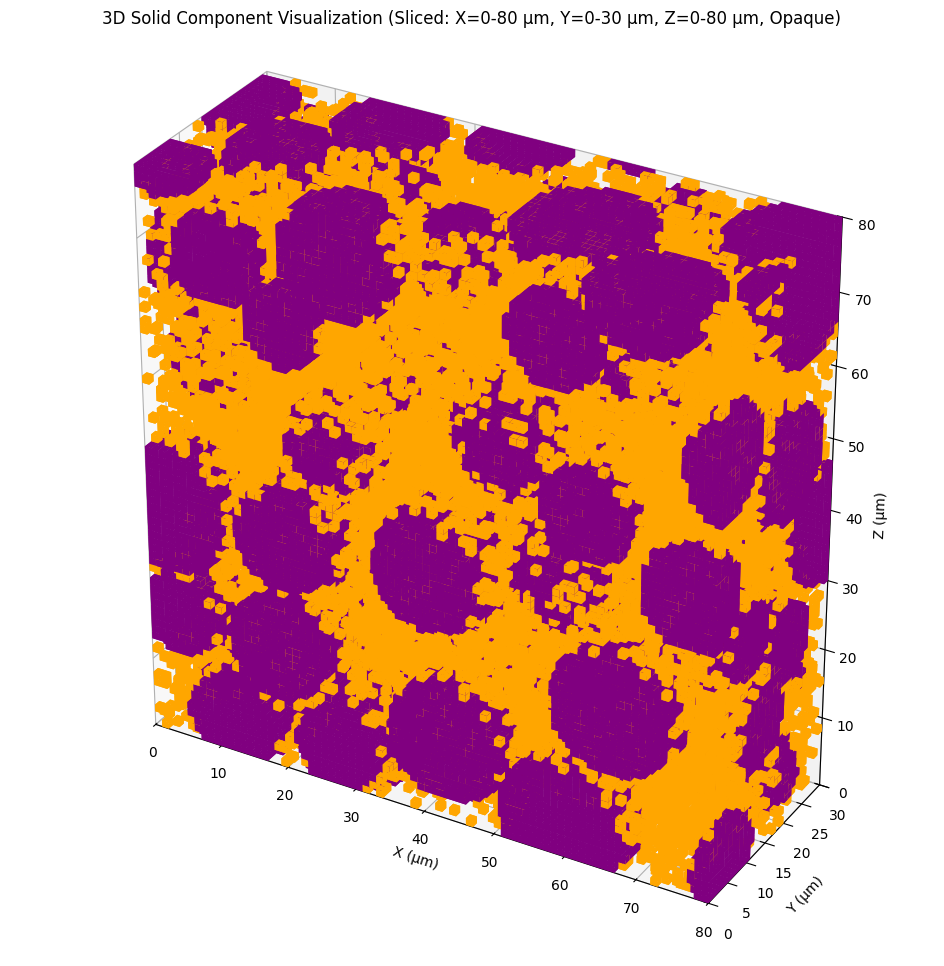

In [ ]:
# 1. Create a 3D figure and axes
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')

# 2. Define colors for each component and create masks
# LFP = 1 (e.g., Purple)
# CBM = 2 (e.g., Orange)
# Electrolyte = 0 (Transparent)

lfp_mask = component_map_3d == 1
cbm_mask = component_map_3d == 2
electrolyte_mask = component_map_3d == 0 # This will be transparent

# 3. Create color and filled arrays for the ENTIRE grid, but only populate the slice
D, H, W = component_map_3d.shape
# Initialize filled mask for the entire grid (all False initially)
full_filled = np.zeros((D, H, W), dtype=bool)
# Initialize colors array for the entire grid (fully transparent initially)
colors = np.full((D, H, W, 4), [0.0, 0.0, 0.0, 0.0]) # Use 'colors' variable name directly

# 4. Define the bounding box for visualization (voxel indices)
x_min_idx, x_max_idx = 0, 80
y_min_idx, y_max_idx = 0, 30
z_min_idx, z_max_idx = 0, 80 # Z corresponds to the first dimension in numpy array (depth)

# Ensure bounds are within the actual data dimensions
x_max_idx = min(x_max_idx, W)
y_max_idx = min(y_max_idx, H)
z_max_idx = min(z_max_idx, D)

# 5. Populate the full_filled and colors arrays ONLY within the slice
# Identify the filled voxels within the original component_map_3d that fall into the slice
slice_lfp_mask = lfp_mask[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx]
slice_cbm_mask = cbm_mask[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx]

# Set the corresponding locations in the full_filled mask to True
full_filled[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx][slice_lfp_mask] = True
full_filled[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx][slice_cbm_mask] = True

# Assign colors to the corresponding locations in the colors array with full opacity
colors[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx][slice_lfp_mask] = [0.5, 0.0, 0.5, 1.0] # RGBA: Purple, Alpha = 1.0 (Fully opaque)
colors[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx][slice_cbm_mask] = [1.0, 0.65, 0.0, 1.0] # RGBA: Orange, Alpha = 1.0 (Fully opaque)


# Check if there are any filled voxels in the *sliced* region (by checking the full_filled array)
if np.any(full_filled[z_min_idx:z_max_idx, y_min_idx:y_max_idx, x_min_idx:x_max_idx]):
    # Use ax.voxels to visualize the full grid, but only the sliced part is filled/colored
    # Since we are providing filled and colors for the entire grid size (D, H, W),
    # ax.voxels will draw them at their correct positions relative to the origin (0,0,0).
    ax.voxels(full_filled,
              facecolors=colors, # Use the colors array with full opacity for filled voxels
              edgecolors=None, # Do not draw edges
              shade=False      # No shading for simplicity and speed
             )
else:
    print(f"No LFP or CBM voxels found in the range X:{x_min_idx}-{x_max_idx-1}, Y:{y_min_idx}-{y_max_idx-1}, Z:{z_min_idx}-{z_max_idx-1}.")


# 6. Set axis limits to match the physical extent of the sliced region
# Convert voxel indices to physical units (μm) using voxel_size
x_min_mu = x_min_idx * voxel_size
x_max_mu = x_max_idx * voxel_size
y_min_mu = y_min_idx * voxel_size
y_max_mu = y_max_idx * voxel_size
z_min_mu = z_min_idx * voxel_size
z_max_mu = z_max_idx * voxel_size

ax.set_xlim(x_min_mu, x_max_mu)
ax.set_ylim(y_min_mu, y_max_mu)
ax.set_zlim(z_min_mu, z_max_mu)


# Set axis labels to reflect physical units (μm)
ax.set_xlabel(f'X (μm)')
ax.set_ylabel(f'Y (μm)')
ax.set_zlabel(f'Z (μm)')


# 7. Add title
ax.set_title(f'3D Solid Component Visualization (Sliced: X={x_min_mu:.0f}-{x_max_mu:.0f} μm, Y={y_min_mu:.0f}-{y_max_mu:.0f} μm, Z={z_min_mu:.0f}-{z_max_mu:.0f} μm, Opaque)')

# 8. Ensure equal aspect ratio (for voxel grid with equal voxel size, this means unit aspect ratio)
ax.set_aspect('equal', adjustable='box')

# No color bar needed for this simplified view

# 9. Display the plot
plt.show()

Visualizing X-Z slices for Y = 0 to 5 as individual plots.


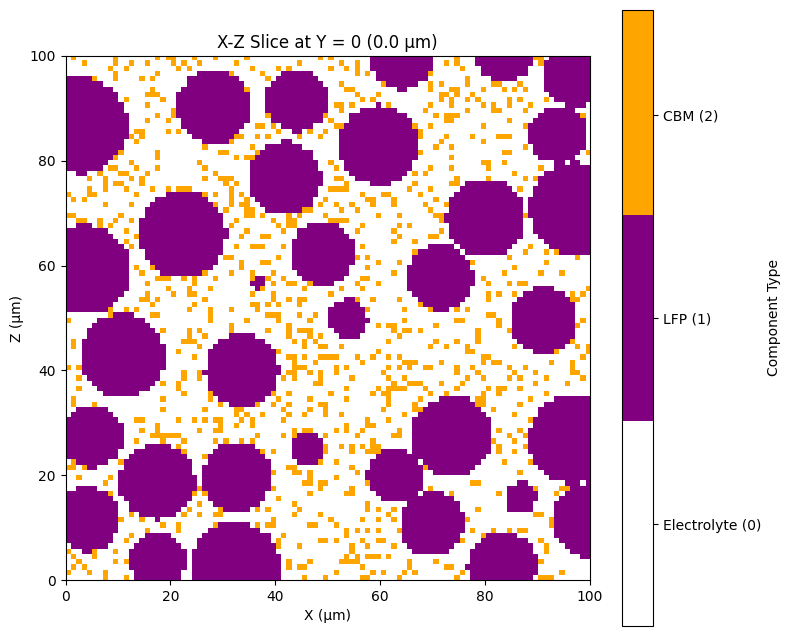

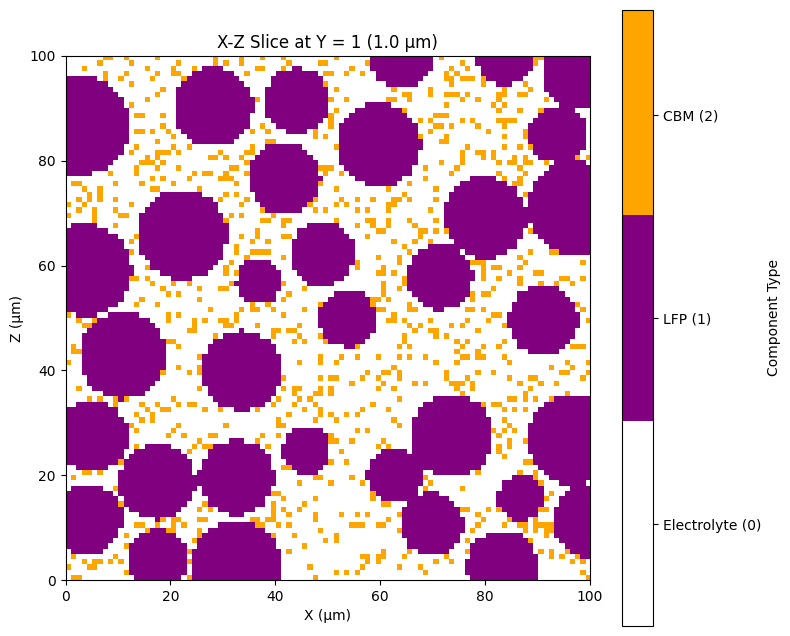

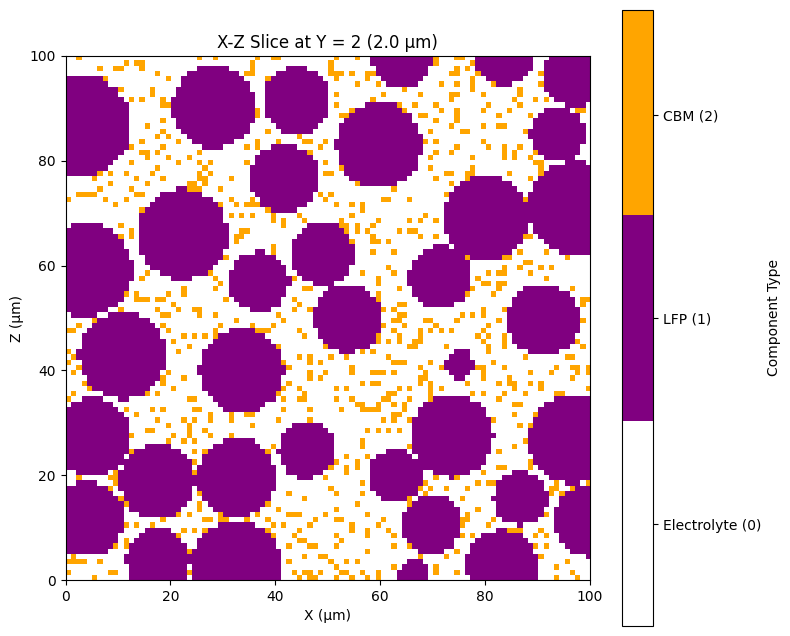

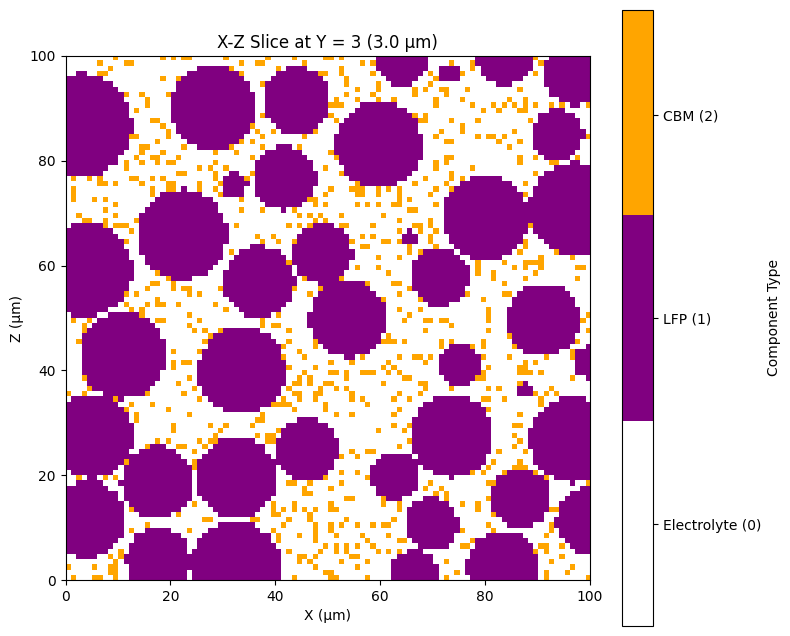

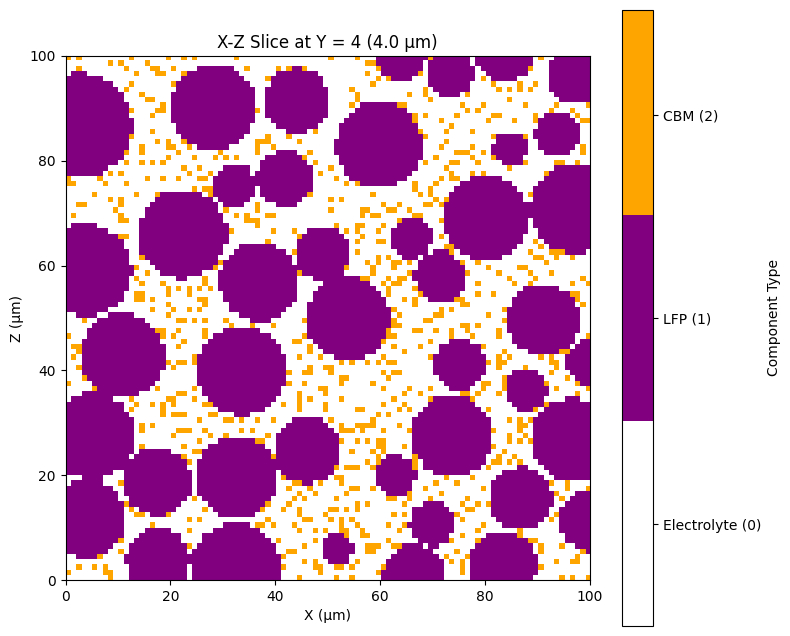

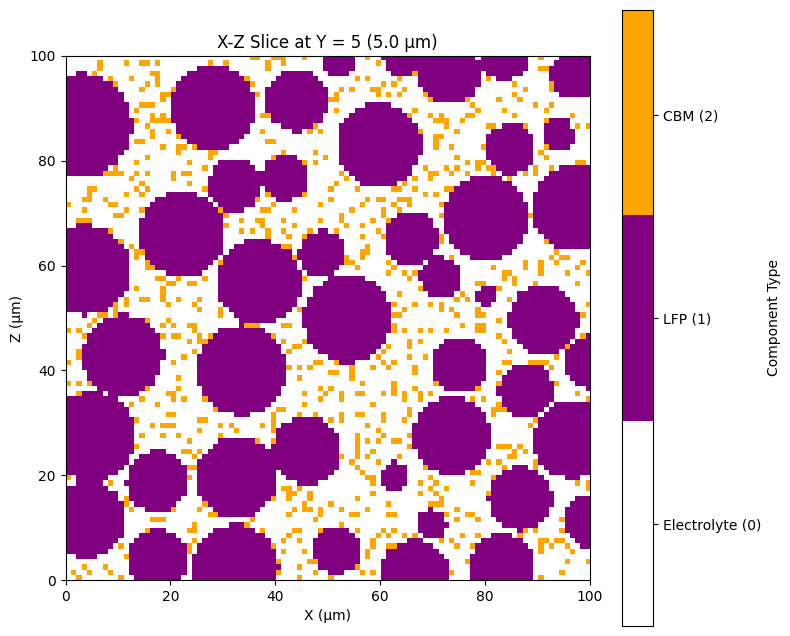

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Define the range of Y slices to visualize
y_start_slice = 0
y_end_slice = 5 # Inclusive, so slices from y=0 to y=5

# Ensure the slice range is within the bounds of the data
H = component_map_3d.shape[1] # Height is the second dimension (Y)
y_end_slice = min(y_end_slice, H - 1)

# Define a colormap for the components
# 0: Electrolyte (e.g., White)
# 1: LFP (e.g., Purple)
# 2: CBM (e.g., Orange)
cmap_components = ListedColormap(["#FFFFFF", "#800080", "#FFA500"])

print(f"Visualizing X-Z slices for Y = {y_start_slice} to {y_end_slice} as individual plots.")

# Iterate through the specified Y slices and create a separate plot for each
for i, y_slice in enumerate(range(y_start_slice, y_end_slice + 1)):
    # Create a new figure and axes for each slice
    fig, ax = plt.subplots(figsize=(8, 8)) # Adjust figure size for individual plots

    # Extract the X-Z slice at the current Y level
    # component_map_3d has shape (D, H, W) -> Z, Y, X
    xz_slice = component_map_3d[:, y_slice, :] # Slice along the Y dimension

    # Visualize the X-Z slice using imshow
    # origin='lower' to match typical Cartesian coordinates (X horizontal, Z vertical)
    # aspect='equal' to ensure correct aspect ratio
    # extent to label axes in physical units (μm) - Z is vertical, X is horizontal
    D, H, W = component_map_3d.shape # Get dimensions again for clarity

    x_min_mu = 0 * voxel_size
    x_max_mu = W * voxel_size # Extent is exclusive at the upper bound
    z_min_mu = 0 * voxel_size
    z_max_mu = D * voxel_size # Extent is exclusive at the upper bound


    im = ax.imshow(xz_slice, cmap=cmap_components, origin='lower', aspect='equal',
                   extent=[x_min_mu, x_max_mu, z_min_mu, z_max_mu])

    # Set title and labels for each slice
    ax.set_title(f'X-Z Slice at Y = {y_slice} ({y_slice * voxel_size:.1f} μm)')
    ax.set_xlabel('X (μm)')
    ax.set_ylabel('Z (μm)')

    # Add a colorbar to the figure (optional, but helpful)
    # Create a dummy scalar mappable for the colorbar associated with this figure
    sm = plt.cm.ScalarMappable(cmap=cmap_components, norm=plt.Normalize(vmin=0, vmax=2))
    sm.set_array([]) # Dummy array
    # Position the colorbar next to the current axes
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', shrink=0.8)
    cbar.set_ticks([0.33, 1, 1.66]) # Position ticks in the middle of color ranges
    cbar.set_ticklabels(['Electrolyte (0)', 'LFP (1)', 'CBM (2)'])
    cbar.set_label('Component Type')

    # Ensure tight layout for the individual figure
    plt.tight_layout()
    # Display the plot for the current slice
    plt.show()